In [1]:
#Create development project location choice model
#Agents are development that happened between 2010 and 2023
#choices are developable parcels

import geopandas as gpd
import pandas as pd
import os
import pyproj
import numpy as np

mycrs=26910
state='CA'
#county='Tahoe County'
os.chdir(r"C:\Users\adc\Documents\Manhan\CAMuLand\TRPA\Supply")
pyproj.datadir.set_data_dir(r'C:\Users\adc\anaconda3\envs\ox\Library\share\proj')

C:\Users\adc\anaconda3\envs\ox\Lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
#get Parce 2023 landvalue and structure value data 
dataset_path = r"..\data\Data for Manhan.gdb"
Parcels = gpd.read_file(dataset_path, driver='fileGDB', layer='ParcelMaster_Redacted', ignore_geometry=False).to_crs(mycrs)
Parcels

,APN,PPNO,HSE_NUMBR,UNIT_NUMBR,STR_DIR,STR_NAME,STR_SUFFIX,APO_ADDRESS,PSTL_TOWN,PSTL_STATE,...,WITHIN_BONUSUNIT_BNDY,GlobalID,created_user,created_date,last_edited_user,last_edited_date,PLAN_TYPE,Shape_Length,Shape_Area,geometry
0,048-041-03,4.804103e+06,24101,,,MOUNT ROSE,HWY,24101 MOUNT ROSE HWY,Incline Village,NV,...,0,{7C073190-24BE-4756-9B4E-374A13675CCD},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:08+00:00,,310.956047,5.805863e+03,"MULTIPOLYGON (((763453.169 4357152.779, 763446..."
1,048-041-20,4.804120e+06,24655,,,MOUNT ROSE,HWY,24655 MOUNT ROSE HWY,Incline Village,NV,...,0,{3AFCD8A4-D768-4D06-846D-65C65C359B9F},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:09+00:00,,31908.073673,4.389954e+07,"MULTIPOLYGON (((758228.855 4351689.272, 758044..."
2,048-042-02,4.804202e+06,0,,,MOUNT ROSE,HWY,0 MOUNT ROSE HWY,Reno,NV,...,0,{54BB5CDD-2B65-493B-A041-A66D8469DC9C},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:09+00:00,,7764.759770,3.353371e+06,"MULTIPOLYGON (((766110.196 4355162.376, 766145..."
3,048-042-03,4.804203e+06,0,,,MOUNT ROSE,HWY,0 MOUNT ROSE HWY,Incline Village,NV,...,0,{B684DE8F-7732-4BA5-B862-BAC0B1A84BCE},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:09+00:00,AREA PLAN,3931.795982,4.409068e+05,"MULTIPOLYGON (((765760.298 4353614.956, 765658..."
4,048-140-03,4.814003e+06,0,,,MOUNT ROSE,HWY,0 MOUNT ROSE HWY,Incline Village,NV,...,0,{DD1A1490-BC51-4151-BB3F-E8D05B17F84B},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:09+00:00,AREA PLAN,956.340444,2.023828e+04,"MULTIPOLYGON (((765501.014 4354660.606, 765512..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61226,1318-10-310-096,1.318103e+11,746,,,LINCOLN,HWY,746 LINCOLN HY,Zephyr Cove,NV,...,0,{FC0D5ABD-D90B-4660-BE37-856106975785},SDE,2023-11-29 18:06:23+00:00,SDE,2024-01-09 00:09:06+00:00,PLAN AREA STATEMENT,143.845906,8.888403e+02,"MULTIPOLYGON (((764148.357 4321679.841, 764133..."
61227,1318-10-310-097,1.318103e+11,0,,,,,,Zephyr Cove,NV,...,0,{6162DDF6-EFFC-4058-A2AE-A11D69503EF7},SDE,2023-11-29 18:06:23+00:00,SDE,2024-01-09 00:09:06+00:00,PLAN AREA STATEMENT,705.437384,8.741106e+03,"MULTIPOLYGON (((764101.905 4321692.257, 764094..."
61228,1318-10-417-055,1.318104e+11,225,,S,MARTIN,DR,225 S MARTIN DR,Zephyr Cove,NV,...,0,{2F9F27DD-3782-4CF6-AE5B-8297D6877EC8},SDE,2023-11-29 18:06:23+00:00,SDE,2024-01-09 00:09:06+00:00,PLAN AREA STATEMENT,130.495432,9.861739e+02,"MULTIPOLYGON (((763843.225 4321172.292, 763834..."
61229,1318-10-310-094,1.318103e+11,716,,,LINCOLN,HWY,716 LINCOLN HY,Zephyr Cove,NV,...,0,{22585386-55A6-4505-BB2E-988A77035E87},SDE,2023-11-29 18:06:23+00:00,SDE,2024-01-09 00:09:06+00:00,PLAN AREA STATEMENT,186.514730,1.701036e+03,"MULTIPOLYGON (((764049.931 4321564.766, 764028..."


In [3]:
selcols=['APN',
 'PPNO',
 'COUNTY_LANDUSE_CODE',
 'COUNTY_LANDUSE_DESCRIPTION',
 'EXISTING_LANDUSE',
 'REGIONAL_LANDUSE',
 'IPES_SCORE',
 'AS_LANDVALUE',
 'AS_IMPROVALUE',
 'AS_SUM',
 'TAX_LANDVALUE',
 'TAX_IMPROVALUE',
 'TAX_SUM',
 'TAX_YEAR',
 'YEAR_BUILT',
 'UNITS',
 'BEDROOMS',
 'BATHROOMS',
 'BUILDING_SQFT',
 'ESTIMATED_COVERAGE_ALLOWED',
 'IMPERVIOUS_SURFACE_SQFT',
 'SOIL_1974',
 'SOIL_2003',
 'CATCHMENT',
 'HRA_NAME',
 'WATERSHED_NUMBER',
 'WATERSHED_NAME',
 'PRIORITY_WATERSHED',
 'FIREPD',
 'PLAN_ID',
 'PLAN_NAME',
 'ZONING_ID',
 'ZONING_DESCRIPTION',
 'TOWN_CENTER',
 'LOCATION_TO_TOWNCENTER',
 'TOLERANCE_ID',
 'TAZ',
 'INDEX_1987',
 'LITTORAL',
 'WITHIN_TRPA_BNDY',
 'LOCAL_PLAN_HYPERLINK',
 'DESIGN_GUIDELINES_HYPERLINK',
 'LTINFO_HYPERLINK',
 'PARCEL_ACRES',
 'PARCEL_SQFT',
 'WITHIN_BONUSUNIT_BNDY',
 'GlobalID',
  'PLAN_TYPE',
 'Shape_Length',
 'Shape_Area',
 'geometry']
Parcels=Parcels[selcols].copy()
Parcels.describe()

,PPNO,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,TAX_LANDVALUE,TAX_IMPROVALUE,TAX_SUM,BUILDING_SQFT,ESTIMATED_COVERAGE_ALLOWED,IMPERVIOUS_SURFACE_SQFT,WATERSHED_NUMBER,TAZ,LITTORAL,WITHIN_TRPA_BNDY,PARCEL_ACRES,PARCEL_SQFT,WITHIN_BONUSUNIT_BNDY,Shape_Length,Shape_Area
count,6.123100e+04,10896.000000,6.123100e+04,6.122900e+04,6.123100e+04,6.123100e+04,6.122900e+04,6.123000e+04,61094.000000,6.123100e+04,6.118700e+04,61231.000000,61228.000000,61231.000000,61231.000000,61231.000000,6.123100e+04,61231.000000,61231.000000,6.123100e+04
mean,1.382094e+10,697.689519,1.719273e+05,2.439741e+05,4.118386e+05,2.669511e+05,2.969932e+05,5.012708e+05,1738.635038,7.682337e+03,3.686774e+03,34.504924,139.238878,0.035293,0.982444,4.012703,1.747932e+05,0.626807,201.395161,1.624187e+04
std,4.063009e+10,256.712212,5.843673e+05,6.809014e+05,1.055628e+06,1.045496e+06,1.055601e+06,1.339769e+06,5699.517633,9.473805e+04,2.131436e+04,17.527456,84.482162,0.184520,0.131334,82.024888,3.573003e+06,0.483657,630.507568,3.319440e+05
min,7.011010e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000042,1.833065e+00,0.000000,1.716021,1.702973e-01
25%,2.320103e+07,649.000000,1.670400e+04,0.000000e+00,5.299200e+04,1.873800e+04,0.000000e+00,6.072950e+04,0.000000,2.167555e+02,4.959425e+02,17.000000,65.000000,0.000000,1.000000,0.115150,5.015897e+03,0.000000,91.596634,4.659941e+02
50%,3.335102e+07,767.000000,7.532900e+04,1.089210e+05,2.071200e+05,1.045500e+05,1.531090e+05,2.681465e+05,1320.000000,1.501813e+03,1.492528e+03,42.000000,134.000000,0.000000,1.000000,0.226335,9.859116e+03,1.000000,124.701966,9.160272e+02
75%,9.316004e+07,852.000000,1.664640e+05,3.122320e+05,4.768455e+05,2.414520e+05,3.511450e+05,5.627508e+05,2020.000000,2.629049e+03,2.647079e+03,44.000000,209.000000,0.000000,1.000000,0.325475,1.417767e+04,1.000000,155.544628,1.317294e+03
max,1.419060e+11,1043.000000,3.216606e+07,7.758222e+07,8.717022e+07,7.397625e+07,1.090273e+08,8.717022e+07,590160.000000,6.487692e+06,1.643423e+06,64.000000,297.000000,1.000000,1.000000,10847.811115,4.725307e+08,1.000000,38419.036865,4.389954e+07


In [4]:
Parcels[['AS_LANDVALUE',
 'AS_IMPROVALUE',
 'AS_SUM',
 'TAX_LANDVALUE',
 'TAX_IMPROVALUE',
 'TAX_SUM',
 'TAX_YEAR',
 'YEAR_BUILT',
 'UNITS',
 'BEDROOMS',
 'BATHROOMS',
 'BUILDING_SQFT',
 'ESTIMATED_COVERAGE_ALLOWED',
 'IMPERVIOUS_SURFACE_SQFT',
 'SOIL_1974',
 'SOIL_2003']].dtypes

AS_LANDVALUE                    int64
AS_IMPROVALUE                 float64
AS_SUM                          int64
TAX_LANDVALUE                   int64
TAX_IMPROVALUE                float64
TAX_SUM                       float64
TAX_YEAR                       object
YEAR_BUILT                     object
UNITS                          object
BEDROOMS                       object
BATHROOMS                      object
BUILDING_SQFT                 float64
ESTIMATED_COVERAGE_ALLOWED    float64
IMPERVIOUS_SURFACE_SQFT       float64
SOIL_1974                      object
SOIL_2003                      object
dtype: object

In [5]:
columns_to_convert = ['UNITS','BEDROOMS', 'BATHROOMS' ]
Parcels[columns_to_convert]=Parcels[columns_to_convert].apply(pd.to_numeric, errors='coerce')
Parcels['YEAR_BUILT']=Parcels['YEAR_BUILT'].replace('N/A', 0)
Parcels['YEAR_BUILT'] = Parcels['YEAR_BUILT'].fillna(0).astype(int)

In [6]:
Parcels['per_AS_IMPROVALUE']=Parcels['AS_IMPROVALUE']/Parcels['AS_SUM'].map(lambda x: x if x>0 else 1) 
Parcels['FAR']=Parcels['BUILDING_SQFT']/Parcels['PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
Parcels['lval_per_sqft']=Parcels['AS_LANDVALUE']/Parcels['PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
Parcels['sqft_per_unit']=Parcels['BUILDING_SQFT']/Parcels['UNITS'].map(lambda x: x if x>0 else 1) 

In [7]:
water_file=r"..\Data\nhd_water.geojson"
water=gpd.read_file(water_file).to_crs(mycrs)

wetland_file=r"..\Data\osm\wetland.geojson"
wetland=gpd.read_file(wetland_file).to_crs(mycrs)
wood_file=r"..\Data\osm\wood.geojson"
wood=gpd.read_file(wood_file).to_crs(mycrs)
park_file=r"..\Data\osm\park.geojson"
park=gpd.read_file(park_file).to_crs(mycrs)

#Calcualte Water Body Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),water.loc[water.geometry.is_valid].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
waterinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(waterinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'water'}, inplace=True)


#Calcualte Wetland Body Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),wetland.loc[wetland.type.isin(['MultiPolygon','Polygon'])].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
wetlandinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(wetlandinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'wetland'}, inplace=True)

#Calcualte Wood Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),wood.loc[wood.type.isin(['MultiPolygon','Polygon'])].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
woodinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(woodinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'wood'}, inplace=True)

#Calcualte Park Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),park.loc[park.geometry.is_valid].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
parkinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(parkinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'park'}, inplace=True)

Parcels[['water','wood','wetland','park']]=Parcels[['water','wood','wetland','park']].fillna(0)

In [8]:
bailey_file=r"..\Data\landcapability_bailey.geojson"
bailey=gpd.read_file(bailey_file).to_crs(mycrs)
#Calcualte Park Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),bailey.loc[bailey.CAPABILITY=='3'].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
bailey3inparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(bailey3inparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'bailey3area'}, inplace=True)

#Calcualte Park Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),bailey.loc[bailey.CAPABILITY.isin(['4','5','6','7'])].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
bailey4pinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(bailey4pinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'bailey4parea'}, inplace=True)

In [9]:
mutlifamz_file=r"..\Data\areas_zoned_multifamily.geojson"
mutlifamz=gpd.read_file(mutlifamz_file).to_crs(mycrs)
mutlifamz.loc[mutlifamz.UNIT.isin(['people per acre', 'persons per acre']),'DENSITY']



51    25
71    15
Name: DENSITY, dtype: object

<Axes: ylabel='Frequency'>

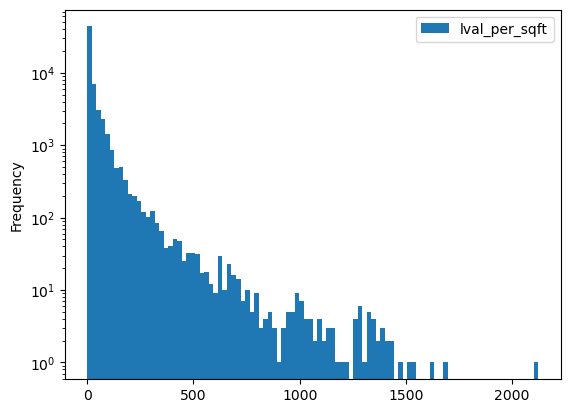

In [10]:
Parcels[['lval_per_sqft']].plot.hist(log=True, bins=100)

<Axes: >

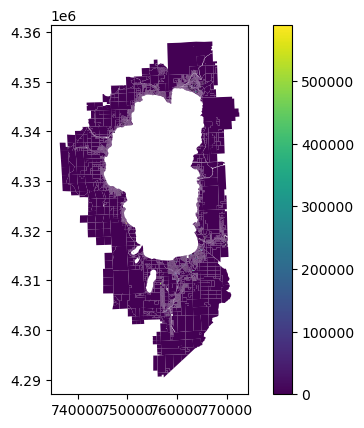

In [11]:
Parcels.plot('sqft_per_unit', legend=True)

In [12]:
#create a centroid geometry to faciliate the join to parcel with multifamily zone
Parcels.loc[:,'centroid']=Parcels.geometry.centroid
Parcels.loc[:,'polygeom']=Parcels.geometry
Parcels.set_geometry('centroid', inplace=True)
Parcels=Parcels.sjoin(mutlifamz[['DENSITY', 'UNIT','geometry']], how='left', predicate='within')
Parcels.drop(columns=['index_right'], inplace=True)
Parcels.rename(columns={'index_left':'index', 'UNIT':'DENSITYUNIT'}, inplace=True)

<Axes: >

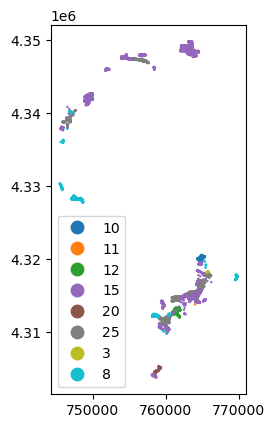

In [13]:
Parcels.plot('DENSITY',markersize=.5, legend=True)

In [14]:
import osmnx as ox
bnds=Parcels.to_crs(4326).total_bounds
mybbox=(bnds[3],bnds[1],bnds[2],bnds[0])
#Get OSM network for driving for the TRPA area
G = ox.graph_from_bbox(bbox=mybbox, network_type="drive")
G=ox.projection.project_graph(G, to_crs=mycrs)

#Create simplifed network and merge nodes within 5 meters together to avoid overcounting of intersections. 
#remove dead_ends to only count intersections with degree 2 or more
G_simplified=ox.simplification.consolidate_intersections(
    G,
    tolerance=5,
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

nodes_s,edges_s=ox.graph_to_gdfs(G_simplified)


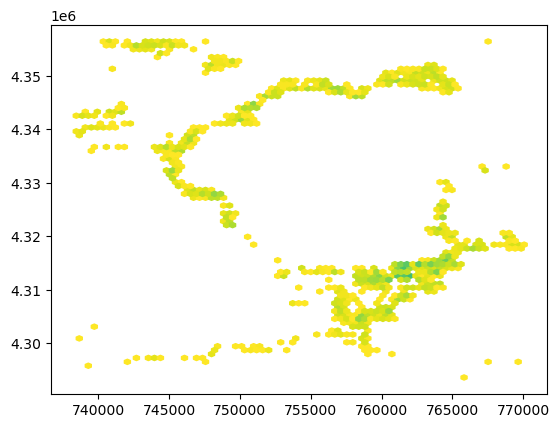

In [15]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
def polygons_from_hexbins(collection):
    hex_polys=collection.get_paths()[0].vertices
    hex_array=[]
    for xs, ys in collection.get_offsets():
        hex_x=np.add(hex_polys[:,0], xs)
        hex_y=np.add(hex_polys[:,1], ys)
        hex_array.append(Polygon(np.vstack([hex_x, hex_y]).T))
        
    counts=collection.get_array()
    return gpd.GeoDataFrame({'count': counts, 'geometry':hex_array})
        
cmap='viridis_r'
collection=plt.hexbin(x=nodes_s['x'], y=nodes_s['y'], gridsize=75, cmap=cmap, mincnt=1,  vmax=100)
        
hex_gdf=polygons_from_hexbins(collection).set_crs(mycrs)
hex_gdf.to_file(r'hex_gdf_intersectioncounts.geojson', driver='GeoJSON')



<Axes: >

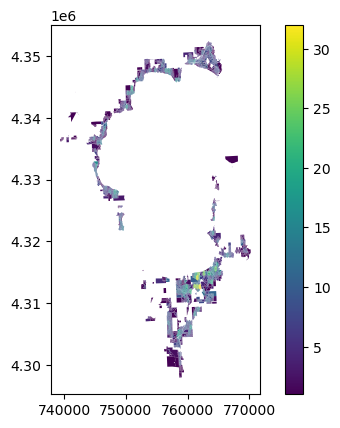

In [16]:
Parcels=Parcels.sjoin(hex_gdf, how='left', predicate='within')
Parcels.drop(columns=['index_right'], inplace=True)
Parcels.rename(columns={'index_left':'index', 'count':'cnt_intersections'}, inplace=True)
  

Parcels.drop(columns=['centroid'], inplace=True)
Parcels.set_geometry('polygeom', inplace=True)
Parcels.plot('cnt_intersections', legend=True)

In [17]:
#create dummy variable to indicate whether parcel is located in developable bailey 3 or 4, 5, 6, 7 zones
Parcels.loc[:,'isbailey4p']=0
Parcels.loc[:,'isbailey3']=0
Parcels.loc[Parcels.bailey4parea>Parcels.Shape_Area*0.8, 'isbailey4p']=1
Parcels.loc[Parcels.bailey3area>Parcels.Shape_Area*0.8, 'isbailey3']=1
Parcels.loc[:,'DENSITY']=Parcels.DENSITY.astype('d')
Parcels.loc[:,'usableland']=Parcels.apply(lambda r: r['PARCEL_SQFT']-10.7639104*(r['water']+r['wood']+r['park']+r['wetland']), axis=1)
Parcels.loc[:,'Acres10p']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x>=435600 else 0)
Parcels.loc[:,'Acres5to10']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x>=267800 and x<435600 else 0)
Parcels.loc[:,'Acres1to5']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<267800 and x>=43560 else 0)
Parcels.loc[:,'Acreshalfto1acres']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<43560 and x>=26780 else 0)
Parcels.loc[:,'Acresquartertohalfacres']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<26780 and x>=13390 else 0)
Parcels.loc[:,'Acreslt4000sqft']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<4000 else 0)

Parcels.loc[:,'DUA']=Parcels.loc[:,'UNITS']*43560.0/Parcels.loc[:,'usableland']
Parcels.loc[(Parcels.DUA>Parcels.DENSITY) | (Parcels.DENSITY.isnull()) ,'DENSITY']=Parcels.loc[(Parcels.DUA>Parcels.DENSITY) | (Parcels.DENSITY.isnull()), 'DUA']
Parcels.loc[:, 'cnt_intersections_n']=Parcels.loc[:, 'cnt_intersections']/Parcels.loc[:, 'cnt_intersections'].max()

C:\Users\adc\anaconda3\envs\ox\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [18]:
#Get 9 neibors
import numpy as np
from sklearn.neighbors import BallTree
k=8
# the formula to calculate radiant required by haversine
Parcels['lat_rad'] = np.deg2rad(Parcels.geometry.centroid.to_crs(4326).y)
Parcels['lon_rad'] = np.deg2rad(Parcels.geometry.centroid.to_crs(4326).x)

ball_tree = BallTree(Parcels[["lat_rad", "lon_rad"]], metric="haversine")

neighbors = ball_tree.query(
    Parcels[["lat_rad", "lon_rad"]],
    k=(
        k + 1
    ),  # k + 1 because we remove the address itself later, hence we need k - 1 = k_desired
    return_distance=False,  
    sort_results=True,
)

neighbors

array([[    0,     1,     5, ...,    25,    23,    24],
       [    1,     0,     5, ...,  4840,  4841,  4842],
       [    2,     4,     3, ...,     7,     8,    41],
       ...,
       [61228, 16788, 61224, ..., 16199, 16235, 12673],
       [61229, 15002, 15067, ..., 15068, 15000, 61227],
       [61230, 16310, 11699, ..., 11697, 11698, 15803]], dtype=int64)

In [19]:
nei_parcel = pd.DataFrame(index=Parcels.index)
ncols=['neighbors_PARCEL_SQFT','neighbors_usableland','neighbors_totalunits','neighbors_BUILDING_SQFT','neighbors_AS_SUM','neighbors_AS_IMPROVALUE','neighbors_AS_LANDVALUE','neighbors_per_built']
for c in ncols:
   nei_parcel[c]=None

In [20]:
# remove the address/point itself from the array because it itself is its nearest neighbour
neighbors = neighbors[:, 1:]
#calculate neiboring parcels total land sqft
nei_parcel['neighbors_PARCEL_SQFT']= [
    Parcels['PARCEL_SQFT'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels totalusable land sqft
nei_parcel['neighbors_usableland']= [
    Parcels['usableland'].iloc[n].sum() for n in neighbors
]



In [21]:
Parcels.loc[:, 'AS_SUM_nonew']=Parcels.apply(lambda r: r.AS_LANDVALUE if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.AS_SUM, axis=1)

#calculate neiboring parcels total value as_sum
nei_parcel['neighbors_AS_SUM']= [
    Parcels['AS_SUM_nonew'].iloc[n].sum() for n in neighbors
]

Parcels.drop(columns=['AS_SUM_nonew'], inplace=True)

#calculate neiboring parcels assessed land value
nei_parcel['neighbors_AS_LANDVALUE']= [
    Parcels['AS_LANDVALUE'].iloc[n].sum() for n in neighbors
]

Parcels.loc[:, 'BUILDING_SQFT_nonew']=Parcels.apply(lambda r: 0 if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.BUILDING_SQFT, axis=1)

#calculate neiboring parcels total building sqft
nei_parcel['neighbors_BUILDING_SQFT']= [
    Parcels['BUILDING_SQFT_nonew'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels percent with building_sqft>0
nei_parcel['neighbors_per_built']= [
   Parcels['BUILDING_SQFT_nonew'].iloc[n].map(lambda x: 1 if x>0 else 0).sum()/8.0 for n in neighbors
]

Parcels.drop(columns=['BUILDING_SQFT_nonew'], inplace=True)


Parcels.loc[:, 'UNITS_nonew']=Parcels.apply(lambda r: 0 if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.UNITS, axis=1)


#calculate neiboring parcels total units
nei_parcel['neighbors_totalunits']= [
   Parcels['UNITS_nonew'].iloc[n].sum() for n in neighbors
]

Parcels.drop(columns=['UNITS_nonew'], inplace=True)

In [22]:
#calculate neighboring parcels average percentage of improved value and FAR ratio
nei_parcel['neighbors_per_AS_IMPROVALUE']=nei_parcel['neighbors_AS_IMPROVALUE']/nei_parcel['neighbors_AS_SUM'].map(lambda x: x if x>0 else 1) 
nei_parcel['neighbors_FAR']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
nei_parcel['neighbors_lval_per_sqft']=nei_parcel['neighbors_AS_LANDVALUE']/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1)
nei_parcel['neighbors_bldsqft_per_unit']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_totalunits'].map(lambda x: x if x>0 else 1)
nei_parcel['neighbors_unit_per_acre']=nei_parcel['neighbors_totalunits']*43560.0/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1)


In [23]:
Parcels = pd.concat([Parcels, nei_parcel[['neighbors_per_AS_IMPROVALUE','neighbors_FAR','neighbors_per_built','neighbors_lval_per_sqft','neighbors_bldsqft_per_unit','neighbors_unit_per_acre']]], axis=1)
Parcels

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,DUA,cnt_intersections_n,lat_rad,lon_rad,neighbors_per_AS_IMPROVALUE,neighbors_FAR,neighbors_per_built,neighbors_lval_per_sqft,neighbors_bldsqft_per_unit,neighbors_unit_per_acre
0,048-041-03,4.804103e+06,140,"Vacant, commercial",Open Space,,NaN,3309,0.0,3309,...,0.0,NaN,0.686322,-2.093423,NaN,0.000000,0.000,0.055981,0.000000,0.000000
1,048-041-20,4.804120e+06,120,"Vacant, single family",Open Space,,NaN,25891687,0.0,25891687,...,0.0,NaN,0.686029,-2.093757,NaN,0.000050,0.125,0.065134,2706.000000,0.000803
2,048-042-02,4.804202e+06,100,"Vacant, other or unknown",Open Space,,NaN,2014352,5330.0,2019682,...,0.0,NaN,0.685863,-2.092817,NaN,0.000000,0.000,0.060802,0.000000,0.000000
3,048-042-03,4.804203e+06,120,"Vacant, single family",Open Space,Conservation,NaN,261641,0.0,261641,...,0.0,NaN,0.685774,-2.093031,NaN,0.000000,0.000,0.060147,0.000000,0.000000
4,048-140-03,4.814003e+06,120,"Vacant, single family",Vacant,Conservation,NaN,602455,0.0,602455,...,0.0,NaN,0.685892,-2.093033,NaN,0.000000,0.000,0.055343,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61226,1318-10-310-096,1.318103e+11,200,None,Single Family Residential,Residential,NaN,721000,507778.0,1228778,...,NaN,0.43750,0.680753,-2.093522,NaN,0.200438,0.750,51.953133,2296.666667,3.801630
61227,1318-10-310-097,1.318103e+11,270,None,Condominium Common Area,Residential,NaN,0,0.0,0,...,NaN,0.43750,0.680748,-2.093546,NaN,0.142702,0.625,63.926082,1541.777778,4.031786
61228,1318-10-417-055,1.318104e+11,200,None,Single Family Residential,Residential,NaN,253750,224817.0,478567,...,NaN,0.25000,0.680674,-2.093585,NaN,0.236375,0.750,15.443252,3205.333333,3.212295
61229,1318-10-310-094,1.318103e+11,200,None,Single Family Residential,Residential,NaN,966000,44566.0,1010566,...,NaN,0.43750,0.680738,-2.093542,NaN,0.077414,0.750,25.593903,1404.300000,2.401315


In [24]:
Parcels.loc[:, 'IPES_SCORE_n']=Parcels.loc[:, 'IPES_SCORE']/Parcels.loc[:, 'IPES_SCORE'].max()
Parcels.loc[:, 'lval_per_sqft_n']=Parcels.loc[:, 'lval_per_sqft']/Parcels.loc[:, 'lval_per_sqft'].max()
Parcels.loc[:, 'neighbors_lval_per_sqft_n']=Parcels.loc[:, 'neighbors_lval_per_sqft']/Parcels.loc[:, 'neighbors_lval_per_sqft'].max()
Parcels.loc[:, 'neighbors_bldsqft_per_unit_n']=Parcels.loc[:, 'neighbors_bldsqft_per_unit']/Parcels.loc[:, 'neighbors_bldsqft_per_unit'].max()

    

In [25]:
Parcels.loc[(Parcels.YEAR_BUILT>2010) & (Parcels.BUILDING_SQFT>0),'EXISTING_LANDUSE'].unique()

array(['Single Family Residential', 'Condominium',
       'Condominium Common Area', 'Commercial',
       'Multi-Family Residential', 'Vacant', 'Tourist Accommodation',
       'Public Service'], dtype=object)

In [26]:
Parcels.loc[Parcels.BUILDING_SQFT.isnull(), ['APN','BUILDING_SQFT','EXISTING_LANDUSE']]

,APN,BUILDING_SQFT,EXISTING_LANDUSE
1886,1419-00-001-002,NaN,Open Space
61052,090-282-018,NaN,Commercial
61053,097-140-043,NaN,Single Family Residential
61054,116-080-003,NaN,Single Family Residential
61055,097-130-030,NaN,Multi-Family Residential
...,...,...,...
61226,1318-10-310-096,NaN,Single Family Residential
61227,1318-10-310-097,NaN,Condominium Common Area
61228,1318-10-417-055,NaN,Single Family Residential
61229,1318-10-310-094,NaN,Single Family Residential


In [27]:
Parcels['BUILDING_SQFT']=Parcels['BUILDING_SQFT'].fillna(0)

In [28]:
Parcels.loc[Parcels.DUA.isnull(), ['APN','BUILDING_SQFT','EXISTING_LANDUSE','DUA','DENSITY']]

,APN,BUILDING_SQFT,EXISTING_LANDUSE,DUA,DENSITY
1483,097-050-097,0.0,Public Service,NaN,NaN
1484,097-020-012,0.0,Open Space,NaN,NaN
1485,097-060-027,0.0,Open Space,NaN,NaN
1486,085-010-011,0.0,Open Space,NaN,NaN
1487,097-020-014,0.0,Open Space,NaN,NaN
...,...,...,...,...,...
61226,1318-10-310-096,0.0,Single Family Residential,NaN,NaN
61227,1318-10-310-097,0.0,Condominium Common Area,NaN,NaN
61228,1318-10-417-055,0.0,Single Family Residential,NaN,NaN
61229,1318-10-310-094,0.0,Single Family Residential,NaN,NaN


In [29]:
Parcels.loc[(Parcels.BUILDING_SQFT==0) & (Parcels.EXISTING_LANDUSE=='Single Family Residential')]

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,neighbors_per_AS_IMPROVALUE,neighbors_FAR,neighbors_per_built,neighbors_lval_per_sqft,neighbors_bldsqft_per_unit,neighbors_unit_per_acre,IPES_SCORE_n,lval_per_sqft_n,neighbors_lval_per_sqft_n,neighbors_bldsqft_per_unit_n
151,1318-22-002-106,1.318220e+11,282,Single Family Residential with Minor Improveme...,Single Family Residential,Recreation,NaN,2135000,4476.0,0,...,NaN,0.000000,0.000,45.063942,0.000000,0.000000,NaN,0.007035,0.042114,0.000000
276,1319-19-702-001,1.319197e+11,280,Single Family Residential with Minor Improvements,Single Family Residential,,NaN,118300,7578.0,125878,...,NaN,0.007186,0.375,0.573905,1314.666667,0.238088,NaN,0.000017,0.000536,0.003472
312,1318-22-001-009,1.318220e+11,280,Single Family Residential with Minor Improvements,Single Family Residential,Recreation,NaN,87500,15895.0,0,...,NaN,0.000000,0.000,0.000000,0.000000,0.000000,NaN,0.000004,0.000000,0.000000
372,018-020-011,1.802001e+07,15,DEV RES RESIDENCE ON LEASED LAND,Single Family Residential,Conservation,NaN,0,0.0,0,...,NaN,0.000000,0.000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
373,018-020-010,1.802001e+07,15,DEV RES RESIDENCE ON LEASED LAND,Single Family Residential,Conservation,NaN,0,0.0,0,...,NaN,0.000000,0.000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61225,1418-15-511-026,1.418155e+11,200,None,Single Family Residential,Residential,NaN,337750,62633.0,400383,...,NaN,0.527399,0.375,77.144468,4638.000000,4.953317,NaN,0.062004,0.072094,0.012248
61226,1318-10-310-096,1.318103e+11,200,None,Single Family Residential,Residential,NaN,721000,507778.0,1228778,...,NaN,0.200438,0.750,51.953133,2296.666667,3.801630,NaN,0.035516,0.048552,0.006065
61228,1318-10-417-055,1.318104e+11,200,None,Single Family Residential,Residential,NaN,253750,224817.0,478567,...,NaN,0.236375,0.750,15.443252,3205.333333,3.212295,NaN,0.011266,0.014432,0.008465
61229,1318-10-310-094,1.318103e+11,200,None,Single Family Residential,Residential,NaN,966000,44566.0,1010566,...,NaN,0.077414,0.750,25.593903,1404.300000,2.401315,NaN,0.024864,0.023918,0.003709


In [30]:
Parcels.loc[(Parcels.BUILDING_SQFT==0) & (Parcels.EXISTING_LANDUSE=='Single Family Residential')]

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,neighbors_per_AS_IMPROVALUE,neighbors_FAR,neighbors_per_built,neighbors_lval_per_sqft,neighbors_bldsqft_per_unit,neighbors_unit_per_acre,IPES_SCORE_n,lval_per_sqft_n,neighbors_lval_per_sqft_n,neighbors_bldsqft_per_unit_n
151,1318-22-002-106,1.318220e+11,282,Single Family Residential with Minor Improveme...,Single Family Residential,Recreation,NaN,2135000,4476.0,0,...,NaN,0.000000,0.000,45.063942,0.000000,0.000000,NaN,0.007035,0.042114,0.000000
276,1319-19-702-001,1.319197e+11,280,Single Family Residential with Minor Improvements,Single Family Residential,,NaN,118300,7578.0,125878,...,NaN,0.007186,0.375,0.573905,1314.666667,0.238088,NaN,0.000017,0.000536,0.003472
312,1318-22-001-009,1.318220e+11,280,Single Family Residential with Minor Improvements,Single Family Residential,Recreation,NaN,87500,15895.0,0,...,NaN,0.000000,0.000,0.000000,0.000000,0.000000,NaN,0.000004,0.000000,0.000000
372,018-020-011,1.802001e+07,15,DEV RES RESIDENCE ON LEASED LAND,Single Family Residential,Conservation,NaN,0,0.0,0,...,NaN,0.000000,0.000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
373,018-020-010,1.802001e+07,15,DEV RES RESIDENCE ON LEASED LAND,Single Family Residential,Conservation,NaN,0,0.0,0,...,NaN,0.000000,0.000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61225,1418-15-511-026,1.418155e+11,200,None,Single Family Residential,Residential,NaN,337750,62633.0,400383,...,NaN,0.527399,0.375,77.144468,4638.000000,4.953317,NaN,0.062004,0.072094,0.012248
61226,1318-10-310-096,1.318103e+11,200,None,Single Family Residential,Residential,NaN,721000,507778.0,1228778,...,NaN,0.200438,0.750,51.953133,2296.666667,3.801630,NaN,0.035516,0.048552,0.006065
61228,1318-10-417-055,1.318104e+11,200,None,Single Family Residential,Residential,NaN,253750,224817.0,478567,...,NaN,0.236375,0.750,15.443252,3205.333333,3.212295,NaN,0.011266,0.014432,0.008465
61229,1318-10-310-094,1.318103e+11,200,None,Single Family Residential,Residential,NaN,966000,44566.0,1010566,...,NaN,0.077414,0.750,25.593903,1404.300000,2.401315,NaN,0.024864,0.023918,0.003709


In [31]:
unbuildable_cats=['Vacant, other or unknown',
       'Other, unbuildable: roads, restrictions, terrain',
       'Splinter, unbuildable: small size or shape',
       'Vacant - Public Use Lands',
       'Vacant - Splinter and Other Unbuildable', 'Parks for Public Use',
       'Communication, Transportation, and Utility Property of a Local Nature Under Construction',
       'AGP MSC RURAL RESTRICTIVE ZONING - CLCA (ACTIVE)',
       'RLU MSC ENV. SENSITIVE LAND - RESTRICTED USE',
 'SKI FACILITY',
     'UTILITIES, PUBLIC & PRIVATE',
       'RIVERS, LAKES, RESERVOIR, CANAL', 'HIGHWAYS, ROADS, STREETS',
 'TIMBERLAND, ZONED TPZ',
       'Communication, Transportation, and Utility Property of a Local Nature',
       'TPZ MSC TIMBER PRESERVE ZONING - ACTIVE',
       'AGP MSC RURAL RESTRICTIVE ZONING - NON-RENEWAL',
       'CONSERVATION EASEMENT RESTRICTIONS', 
       'COMMON AREA','NON-PROFIT CAMPS/PARKS', 'GOLF COURSE', 'GREENBELT', 'TIMBERLAND, UNRESTRICTED']

In [32]:
Parcels.LOCATION_TO_TOWNCENTER.unique()

array(['', 'Outside Buffer', 'Quarter Mile Buffer', 'Town Center',
       'Further than Quarter Mile from Town Center',
       'Within Quarter Mile of Town Center', 'Within Town Center'],
      dtype=object)

<Axes: >

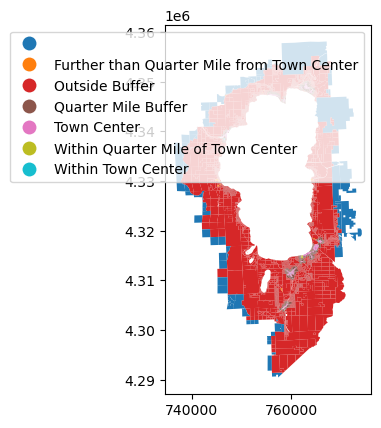

In [33]:
Parcels.plot('LOCATION_TO_TOWNCENTER', legend=True)

In [34]:
Parcels.loc[:, 'is_towncenter']=0
Parcels.loc[:, 'is_outsidebuffer']=0
Parcels.loc[Parcels.LOCATION_TO_TOWNCENTER.isin(['Town Center','Within Town Center']), 'is_towncenter']=1
Parcels.loc[Parcels.LOCATION_TO_TOWNCENTER.isin(['Outside Buffer']), 'is_outsidebuffer']=1

In [35]:
developed_parcels=Parcels.loc[(Parcels.YEAR_BUILT>=2010) &(Parcels.BUILDING_SQFT>0) & ~(Parcels.EXISTING_LANDUSE.isin(['Open Space', 'Vacant']))].copy()
developed_parcels.EXISTING_LANDUSE.unique()

array(['Single Family Residential', 'Condominium',
       'Condominium Common Area', 'Commercial',
       'Multi-Family Residential', 'Tourist Accommodation',
       'Public Service'], dtype=object)

In [36]:
def get_alternative_parcels(df, developed_parcel, num_samples):
    alternatives = df[(df.APN != developed_parcel) &  ((df.BUILDING_SQFT==0)| (df.BUILDING_SQFT.isnull()) ) & ((df.YEAR_BUILT<2010) | (df.YEAR_BUILT.isnull())) & ~(df.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats))]
    return alternatives.sample(num_samples, replace=True)

# Function to create dataframe with developed and alternative parcels
def create_choice_data(df, num_samples):
    choice_data = []
    for index, row in df.loc[df.APN.isin(developed_parcels.APN.unique())].iterrows():
        #print(index)
        developed_parcel = row["APN"]
        alternative_parcels = get_alternative_parcels(df.copy(), developed_parcel, num_samples)
        #print(alternative_parcels.shape)
        #alternative_parcels = get_undeveloped_parcels(df.copy(), num_samples)
        alternative_data = alternative_parcels.to_dict(orient="records")
        for alt_parcel in alternative_data:
            alt_parcel["choice"] = developed_parcel  # Developed parcel is the choice for alternatives
            choice_data.append(alt_parcel)
    return pd.DataFrame(choice_data)

# Get choice data with developed and 29 alternative parcels for each
df_choice = create_choice_data(Parcels, num_samples=29)
df_choice  


,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,neighbors_lval_per_sqft,neighbors_bldsqft_per_unit,neighbors_unit_per_acre,IPES_SCORE_n,lval_per_sqft_n,neighbors_lval_per_sqft_n,neighbors_bldsqft_per_unit_n,is_towncenter,is_outsidebuffer,choice
0,081-031-005,81031005.0,99,,Open Space,Conservation,NaN,0,0.0,0,...,0.061851,4775.666667,0.014669,NaN,0.000000,0.000058,0.012612,0,1,122-100-26
1,015-252-010,15252010.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Vacant,Residential,788.0,156060,0.0,156060,...,14.601294,1424.166667,5.221519,0.755513,0.011752,0.013645,0.003761,0,1,122-100-26
2,125-245-09,12524509.0,120,"Vacant, single family",Open Space,Residential,695.0,86625,0.0,86625,...,14.083816,2342.800000,3.617815,0.666347,0.005921,0.013162,0.006187,0,1,122-100-26
3,033-343-019,33343019.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,0.0,4295,0.0,4295,...,7.924250,1324.500000,2.141460,0.000000,0.000201,0.007406,0.003498,0,1,122-100-26
4,034-825-011,34825011.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,4513,0.0,4513,...,2.198272,1417.500000,2.028863,NaN,0.000213,0.002054,0.003743,0,0,122-100-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48193,014-220-012,14220012.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Backcountry,NaN,0,0.0,0,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,1,112-250-034
48194,031-078-019,31078019.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,0,0.0,0,...,7.085433,1012.800000,5.440035,NaN,0.000000,0.006622,0.002675,0,1,112-250-034
48195,128-370-04,12837004.0,240,Common Area,Condominium Common Area,Residential,NaN,0,0.0,0,...,26.647414,1537.857143,12.044538,NaN,0.000000,0.024903,0.004061,0,1,112-250-034
48196,031-370-004,31370004.0,,,,Mixed-Use,NaN,0,0.0,0,...,8.696982,972.000000,0.000000,NaN,0.000000,0.008128,0.002567,0,0,112-250-034


In [37]:
developed_parcels['choice']=developed_parcels['APN']
developed_parcels['chosen']=1
df_choice['chosen']=0
all_alternatives=pd.concat([developed_parcels,df_choice])
all_alternatives

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,neighbors_bldsqft_per_unit,neighbors_unit_per_acre,IPES_SCORE_n,lval_per_sqft_n,neighbors_lval_per_sqft_n,neighbors_bldsqft_per_unit_n,is_towncenter,is_outsidebuffer,choice,chosen
2029,122-100-26,12210026.0,200,Single Family Residence,Single Family Residential,Residential,NaN,5985000,2919359.0,8904359,...,4290.000000,0.779901,NaN,0.014613,0.040084,0.011329,0,1,122-100-26,1
2030,122-100-27,12210027.0,200,Single Family Residence,Single Family Residential,Residential,NaN,5985000,8124165.0,14109165,...,4269.333333,0.705733,NaN,0.009930,0.040762,0.011275,0,1,122-100-27,1
2031,122-100-28,12210028.0,200,Single Family Residence,Single Family Residential,Residential,NaN,4882500,989471.0,5871971,...,3836.285714,0.571213,NaN,0.026426,0.023542,0.010131,0,1,122-100-28,1
2033,122-111-02,12211102.0,200,Single Family Residence,Single Family Residential,Residential,NaN,165375,530472.0,695847,...,2966.625000,2.358320,NaN,0.003176,0.009936,0.007834,0,1,122-111-02,1
2187,122-126-16,12212616.0,200,Single Family Residence,Single Family Residential,Residential,NaN,183750,670330.0,854080,...,3779.714286,2.081004,NaN,0.005152,0.008979,0.009982,0,1,122-126-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48193,014-220-012,14220012.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Backcountry,NaN,0,0.0,0,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,1,112-250-034,0
48194,031-078-019,31078019.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,0,0.0,0,...,1012.800000,5.440035,NaN,0.000000,0.006622,0.002675,0,1,112-250-034,0
48195,128-370-04,12837004.0,240,Common Area,Condominium Common Area,Residential,NaN,0,0.0,0,...,1537.857143,12.044538,NaN,0.000000,0.024903,0.004061,0,1,112-250-034,0
48196,031-370-004,31370004.0,,,,Mixed-Use,NaN,0,0.0,0,...,972.000000,0.000000,NaN,0.000000,0.008128,0.002567,0,0,112-250-034,0


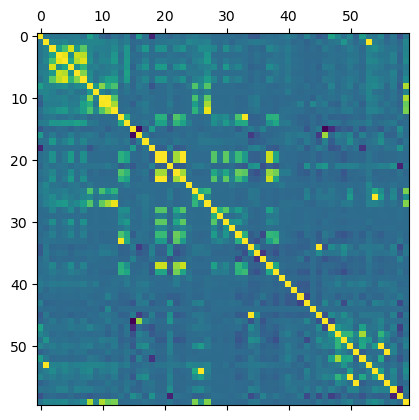

In [38]:
plt.matshow(all_alternatives.select_dtypes(include=np.number).corr())

In [39]:
all_alternatives.select_dtypes(include=np.number).corr()['chosen'].sort_values(key=abs)

TAZ                            -0.000845
Acreshalfto1acres              -0.002116
Acresquartertohalfacres        -0.002270
per_AS_IMPROVALUE              -0.002691
Acreslt4000sqft                -0.002937
neighbors_FAR                   0.003348
WATERSHED_NUMBER                0.003387
lat_rad                        -0.003811
park                           -0.005032
neighbors_bldsqft_per_unit_n   -0.005057
neighbors_bldsqft_per_unit     -0.005057
neighbors_unit_per_acre        -0.005962
wetland                        -0.006264
water                          -0.006517
wood                           -0.006675
IMPERVIOUS_SURFACE_SQFT        -0.008717
Acres5to10                     -0.010380
isbailey3                      -0.013171
Acres1to5                      -0.016138
usableland                     -0.016399
PARCEL_ACRES                   -0.016504
PARCEL_SQFT                    -0.016504
Shape_Area                     -0.016507
WITHIN_TRPA_BNDY                0.018286
ESTIMATED_COVERA

<Axes: >

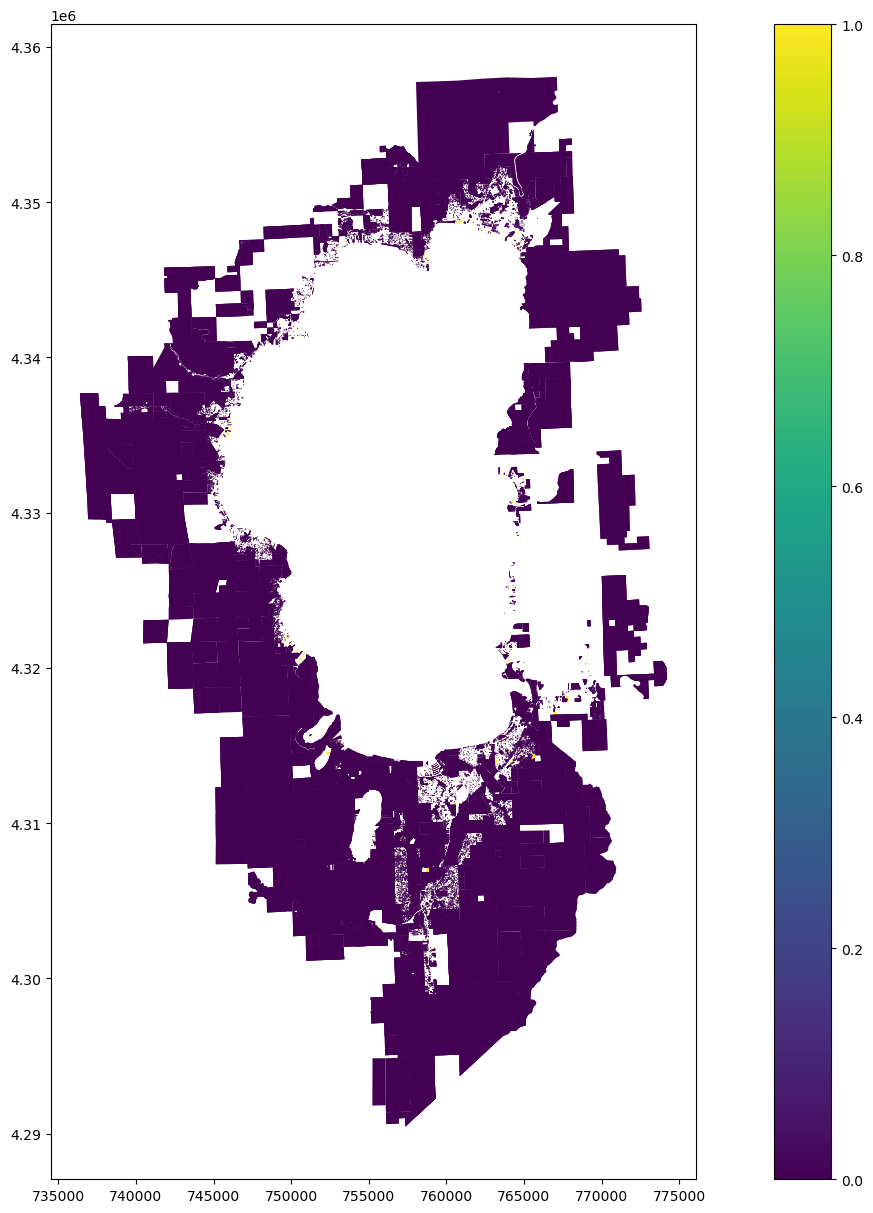

In [40]:
all_alternatives.set_geometry('polygeom').plot('chosen', legend=True, figsize=(20,15))

chosen
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: neighbors_per_built, dtype: object

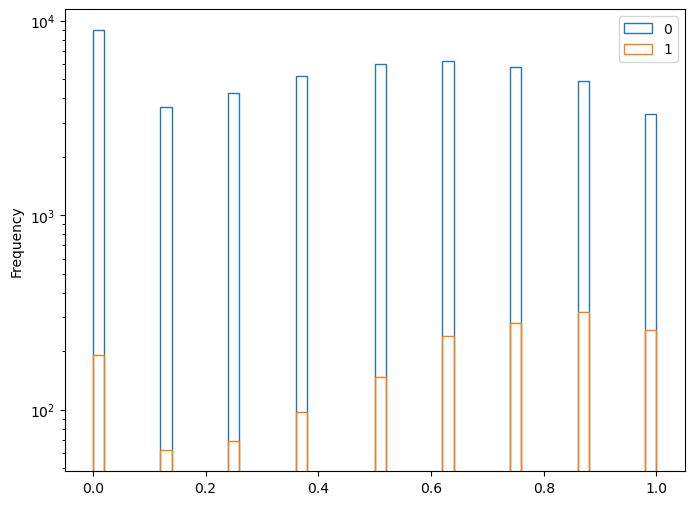

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
hist, bins = np.histogram(all_alternatives['neighbors_per_built'], bins=50)
all_alternatives.groupby('chosen')['neighbors_per_built'].plot(kind='hist', ax=ax, bins=bins, log=True, 
                                                         histtype='step', legend=True)

In [42]:
all_alternatives['neighbors_per_built'] = all_alternatives['neighbors_per_built'] - all_alternatives['chosen']*0.125

chosen
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: neighbors_per_built, dtype: object

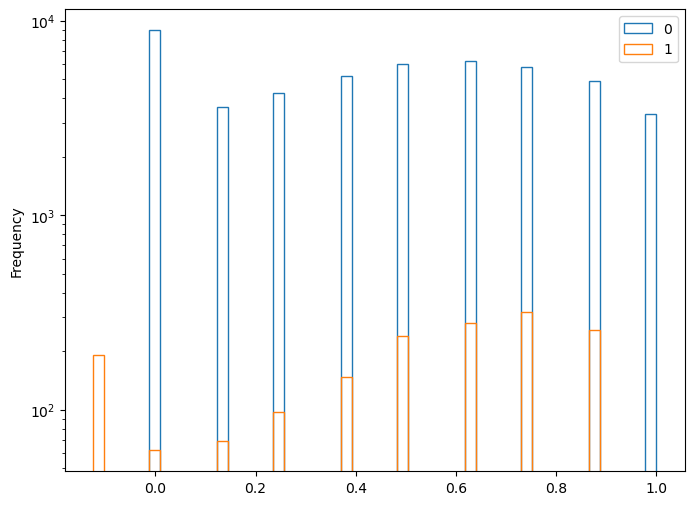

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
hist, bins = np.histogram(all_alternatives['neighbors_per_built'], bins=50)
all_alternatives.groupby('chosen')['neighbors_per_built'].plot(kind='hist', ax=ax, bins=bins, log=True, 
                                                         histtype='step', legend=True)

In [44]:
all_alternatives['ID']=pd.factorize(all_alternatives['choice'])[0]+1
all_alternatives['Alt_ID'] = all_alternatives.groupby('choice')['APN'].rank(ascending=False, method='first').astype(int)
all_alternatives['Alt_Name']=all_alternatives['Alt_ID'].map(lambda x: str(x)+'ALt')
all_alternatives.sort_values(by=['ID','Alt_ID']) 

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,lval_per_sqft_n,neighbors_lval_per_sqft_n,neighbors_bldsqft_per_unit_n,is_towncenter,is_outsidebuffer,choice,chosen,ID,Alt_ID,Alt_Name
10,1418-34-211-021,1.418342e+11,270,Single Family Residential Common Area,Condominium Common Area,Residential,NaN,0,0.0,0,...,0.000000,0.014128,0.008586,0,1,122-100-26,0,1,1,1ALt
20,132-380-00,1.323800e+07,240,Common Area,Condominium Common Area,Residential,NaN,0,0.0,0,...,0.000000,0.026040,0.003297,0,0,122-100-26,0,1,2,2ALt
27,1318-22-002-007,1.318220e+11,330,Five or More Units - Low Rise,Multi-Family Residential,Residential,NaN,427000,409281.0,836281,...,0.004136,0.005126,0.001132,0,0,122-100-26,0,1,3,3ALt
25,129-400-00,1.294000e+07,240,Common Area,Open Space,Residential,NaN,0,0.0,0,...,0.000000,0.008597,0.003549,0,1,122-100-26,0,1,4,4ALt
2,125-245-09,1.252451e+07,120,"Vacant, single family",Open Space,Residential,695.0,86625,0.0,86625,...,0.005921,0.013162,0.006187,0,1,122-100-26,0,1,5,5ALt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48184,031-020-050,3.102005e+07,21,VAC RES VAC RURAL RES LAND 2.51-20.0 AC. 1 UNIT,Vacant,Conservation,NaN,13937,0.0,13937,...,0.000017,0.007548,0.112050,0,0,112-250-034,0,1662,26,26ALt
48186,030-352-011,3.035201e+07,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,0,0.0,0,...,0.000000,0.007927,0.004955,0,1,112-250-034,0,1662,27,27ALt
48169,022-021-007,2.202101e+07,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Vacant,Residential,NaN,0,0.0,0,...,0.000000,0.019036,0.004036,0,1,112-250-034,0,1662,28,28ALt
48180,016-151-038,1.615104e+07,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Vacant,Residential,NaN,0,0.0,0,...,0.000000,0.004685,0.024087,0,1,112-250-034,0,1662,29,29ALt


In [45]:
sel_variables=['APN','YEAR_BUILT','BUILDING_SQFT','usableland','AS_LANDVALUE','per_AS_IMPROVALUE','FAR','lval_per_sqft', 'neighbors_per_AS_IMPROVALUE',
               'neighbors_FAR','neighbors_per_built','neighbors_lval_per_sqft','neighbors_bldsqft_per_unit',
         'WITHIN_TRPA_BNDY','cnt_intersections_n','isbailey4p', 'isbailey3', 'is_towncenter', 'is_outsidebuffer', 'IPES_SCORE']

df_w=all_alternatives.pivot(index='ID', columns='Alt_ID', values=sel_variables+['choice','chosen'])
df_w.columns=[f'{col[0]}_{col[1]}' for col in df_w.columns]
df_w.reset_index(inplace=True)
df_w['choice']=df_w[[f'chosen_{c}' for c in range(1,31)]].idxmax(axis=1).map(lambda x: int(x.split('_')[1]))
df_w['APN']=df_w['choice_1']
df_w.drop(columns=['choice_'+str(i) for i in range(1,31)], inplace=True)
df_w.drop(columns=[f'chosen_{c}' for c in range(1,31)], inplace=True)
df_w

,ID,APN_1,APN_2,APN_3,APN_4,APN_5,APN_6,APN_7,APN_8,APN_9,...,IPES_SCORE_23,IPES_SCORE_24,IPES_SCORE_25,IPES_SCORE_26,IPES_SCORE_27,IPES_SCORE_28,IPES_SCORE_29,IPES_SCORE_30,choice,APN
0,1,1418-34-211-021,132-380-00,1318-22-002-007,129-400-00,125-245-09,122-129-09,122-100-26,115-030-071,094-532-009,...,NaN,NaN,NaN,NaN,NaN,387.0,788.0,NaN,7,122-100-26
1,2,1318-22-711-008,1318-22-317-002,131-121-22,128-180-00,126-460-05,125-233-01,122-100-27,117-180-005,097-072-009,...,NaN,NaN,809.0,213.0,NaN,NaN,NaN,NaN,7,122-100-27
2,3,131-080-15,128-270-06,125-562-02,125-561-01,125-531-32,124-032-29,122-100-28,117-130-035,112-160-019,...,NaN,NaN,0.0,NaN,0.0,NaN,958.0,NaN,7,122-100-28
3,4,1318-23-314-011,129-620-00,128-241-15,125-443-11,123-110-01,122-111-02,098-161-004,097-050-100,095-490-043,...,NaN,NaN,NaN,NaN,NaN,822.0,NaN,NaN,6,122-111-02
4,5,132-390-00,1319-30-627-011,1319-30-529-000,130-311-18,126-083-11,125-373-19,125-372-03,122-126-16,098-272-016,...,748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,122-126-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,1658,880-273-070,132-460-00,1319-30-544-045,129-260-00,128-041-17,126-083-34,125-181-18,125-010-03,123-102-03,...,723.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16,090-113-020
1658,1659,1418-15-511-015,1318-23-212-076,131-214-05,130-302-25,129-030-00,128-060-12,117-150-044,112-173-004,112-160-033,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,7,117-150-044
1659,1660,125-131-07,123-121-05,123-102-04,112-172-021,112-100-017,111-270-061,097-244-027,097-170-005,091-110-015,...,NaN,880.0,NaN,NaN,NaN,NaN,NaN,721.0,6,111-270-061
1660,1661,1418-11-311-014,125-511-19,117-071-024,112-280-040,112-280-002,112-130-023,097-073-044,094-532-002,090-164-014,...,NaN,NaN,NaN,711.0,948.0,696.0,NaN,NaN,4,112-280-040


In [46]:
#df_w[df_w.columns[df_w.dtypes=='object'][30:-1]]=df_w[df_w.columns[df_w.dtypes=='object'][30:-1]].apply(pd.to_numeric, errors='coerce')
df_w.set_index('APN')

,ID,APN_1,APN_2,APN_3,APN_4,APN_5,APN_6,APN_7,APN_8,APN_9,...,IPES_SCORE_22,IPES_SCORE_23,IPES_SCORE_24,IPES_SCORE_25,IPES_SCORE_26,IPES_SCORE_27,IPES_SCORE_28,IPES_SCORE_29,IPES_SCORE_30,choice
APN,,,,,,,,,,,,,,,,,,,,,
122-100-26,1,1418-34-211-021,132-380-00,1318-22-002-007,129-400-00,125-245-09,122-129-09,122-100-26,115-030-071,094-532-009,...,624.0,NaN,NaN,NaN,NaN,NaN,387.0,788.0,NaN,7
122-100-27,2,1318-22-711-008,1318-22-317-002,131-121-22,128-180-00,126-460-05,125-233-01,122-100-27,117-180-005,097-072-009,...,793.0,NaN,NaN,809.0,213.0,NaN,NaN,NaN,NaN,7
122-100-28,3,131-080-15,128-270-06,125-562-02,125-561-01,125-531-32,124-032-29,122-100-28,117-130-035,112-160-019,...,813.0,NaN,NaN,0.0,NaN,0.0,NaN,958.0,NaN,7
122-111-02,4,1318-23-314-011,129-620-00,128-241-15,125-443-11,123-110-01,122-111-02,098-161-004,097-050-100,095-490-043,...,620.0,NaN,NaN,NaN,NaN,NaN,822.0,NaN,NaN,6
122-126-16,5,132-390-00,1319-30-627-011,1319-30-529-000,130-311-18,126-083-11,125-373-19,125-372-03,122-126-16,098-272-016,...,842.0,748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
090-113-020,1658,880-273-070,132-460-00,1319-30-544-045,129-260-00,128-041-17,126-083-34,125-181-18,125-010-03,123-102-03,...,NaN,723.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16
117-150-044,1659,1418-15-511-015,1318-23-212-076,131-214-05,130-302-25,129-030-00,128-060-12,117-150-044,112-173-004,112-160-033,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,7
111-270-061,1660,125-131-07,123-121-05,123-102-04,112-172-021,112-100-017,111-270-061,097-244-027,097-170-005,091-110-015,...,860.0,NaN,880.0,NaN,NaN,NaN,NaN,NaN,721.0,6


In [47]:
developed_parcels.loc[:,"is_SF"]=(developed_parcels.EXISTING_LANDUSE == 'Single Family Residential').astype(int)
developed_parcels.loc[:,"is_MF"]=(developed_parcels.EXISTING_LANDUSE.isin(['Condominium','Condominium Common Area', 'Multi-Family Residential'])).astype(int) 
developed_parcels.loc[:,"is_NR"]=(developed_parcels.EXISTING_LANDUSE.isin(['Commercial', 'Public Service', 'Tourist Accommodation'])).astype(int)      


df_w=df_w.merge(developed_parcels[['APN','is_SF','is_MF','is_NR']], on='APN', how='inner').copy()
df_w

,ID,APN_1,APN_2,APN_3,APN_4,APN_5,APN_6,APN_7,APN_8,APN_9,...,IPES_SCORE_26,IPES_SCORE_27,IPES_SCORE_28,IPES_SCORE_29,IPES_SCORE_30,choice,APN,is_SF,is_MF,is_NR
0,1,1418-34-211-021,132-380-00,1318-22-002-007,129-400-00,125-245-09,122-129-09,122-100-26,115-030-071,094-532-009,...,NaN,NaN,387.0,788.0,NaN,7,122-100-26,1,0,0
1,2,1318-22-711-008,1318-22-317-002,131-121-22,128-180-00,126-460-05,125-233-01,122-100-27,117-180-005,097-072-009,...,213.0,NaN,NaN,NaN,NaN,7,122-100-27,1,0,0
2,3,131-080-15,128-270-06,125-562-02,125-561-01,125-531-32,124-032-29,122-100-28,117-130-035,112-160-019,...,NaN,0.0,NaN,958.0,NaN,7,122-100-28,1,0,0
3,4,1318-23-314-011,129-620-00,128-241-15,125-443-11,123-110-01,122-111-02,098-161-004,097-050-100,095-490-043,...,NaN,NaN,822.0,NaN,NaN,6,122-111-02,1,0,0
4,5,132-390-00,1319-30-627-011,1319-30-529-000,130-311-18,126-083-11,125-373-19,125-372-03,122-126-16,098-272-016,...,NaN,NaN,NaN,NaN,NaN,8,122-126-16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,1658,880-273-070,132-460-00,1319-30-544-045,129-260-00,128-041-17,126-083-34,125-181-18,125-010-03,123-102-03,...,NaN,NaN,NaN,NaN,NaN,16,090-113-020,1,0,0
1658,1659,1418-15-511-015,1318-23-212-076,131-214-05,130-302-25,129-030-00,128-060-12,117-150-044,112-173-004,112-160-033,...,0.0,NaN,NaN,NaN,NaN,7,117-150-044,0,1,0
1659,1660,125-131-07,123-121-05,123-102-04,112-172-021,112-100-017,111-270-061,097-244-027,097-170-005,091-110-015,...,NaN,NaN,NaN,NaN,721.0,6,111-270-061,1,0,0
1660,1661,1418-11-311-014,125-511-19,117-071-024,112-280-040,112-280-002,112-130-023,097-073-044,094-532-002,090-164-014,...,711.0,948.0,696.0,NaN,NaN,4,112-280-040,1,0,0


In [48]:
char_columns = df_w.select_dtypes(['object']).columns
char_columns.to_list()
df_w[char_columns[30:-1]]=df_w[char_columns[30:-1]].apply(pd.to_numeric, errors='coerce')



In [49]:
char_columns = df_w.select_dtypes(['object']).columns
char_columns

Index(['APN_1', 'APN_2', 'APN_3', 'APN_4', 'APN_5', 'APN_6', 'APN_7', 'APN_8',
       'APN_9', 'APN_10', 'APN_11', 'APN_12', 'APN_13', 'APN_14', 'APN_15',
       'APN_16', 'APN_17', 'APN_18', 'APN_19', 'APN_20', 'APN_21', 'APN_22',
       'APN_23', 'APN_24', 'APN_25', 'APN_26', 'APN_27', 'APN_28', 'APN_29',
       'APN_30', 'APN'],
      dtype='object')

In [50]:
df_w.drop(columns=char_columns, inplace=True)
df_w.fillna(0, inplace=True)

In [51]:
df_w.columns.to_list()

['ID',
 'YEAR_BUILT_1',
 'YEAR_BUILT_2',
 'YEAR_BUILT_3',
 'YEAR_BUILT_4',
 'YEAR_BUILT_5',
 'YEAR_BUILT_6',
 'YEAR_BUILT_7',
 'YEAR_BUILT_8',
 'YEAR_BUILT_9',
 'YEAR_BUILT_10',
 'YEAR_BUILT_11',
 'YEAR_BUILT_12',
 'YEAR_BUILT_13',
 'YEAR_BUILT_14',
 'YEAR_BUILT_15',
 'YEAR_BUILT_16',
 'YEAR_BUILT_17',
 'YEAR_BUILT_18',
 'YEAR_BUILT_19',
 'YEAR_BUILT_20',
 'YEAR_BUILT_21',
 'YEAR_BUILT_22',
 'YEAR_BUILT_23',
 'YEAR_BUILT_24',
 'YEAR_BUILT_25',
 'YEAR_BUILT_26',
 'YEAR_BUILT_27',
 'YEAR_BUILT_28',
 'YEAR_BUILT_29',
 'YEAR_BUILT_30',
 'BUILDING_SQFT_1',
 'BUILDING_SQFT_2',
 'BUILDING_SQFT_3',
 'BUILDING_SQFT_4',
 'BUILDING_SQFT_5',
 'BUILDING_SQFT_6',
 'BUILDING_SQFT_7',
 'BUILDING_SQFT_8',
 'BUILDING_SQFT_9',
 'BUILDING_SQFT_10',
 'BUILDING_SQFT_11',
 'BUILDING_SQFT_12',
 'BUILDING_SQFT_13',
 'BUILDING_SQFT_14',
 'BUILDING_SQFT_15',
 'BUILDING_SQFT_16',
 'BUILDING_SQFT_17',
 'BUILDING_SQFT_18',
 'BUILDING_SQFT_19',
 'BUILDING_SQFT_20',
 'BUILDING_SQFT_21',
 'BUILDING_SQFT_22',
 'BUILDIN

In [52]:
ncols_df = pd.DataFrame(index=df_w.index)
icols=["is_SFbyneighbors_per_AS_IMPROVALUE","is_SFbyneighbors_FAR", "is_SFbyneighbors_per_built",
       "is_SFbyneighbors_lval_per_sqft","is_SFbycnt_intersections_n",
       "is_MFbyneighbors_per_AS_IMPROVALUE","is_MFbyneighbors_FAR", "is_MFbyneighbors_per_built",
       "is_MFbyneighbors_lval_per_sqft","is_MFbycnt_intersections_n",
       "is_NRbyneighbors_per_AS_IMPROVALUE","is_NRbyneighbors_FAR", "is_NRbyneighbors_per_built",
       "is_NRbyneighbors_lval_per_sqft","is_NRbycnt_intersections_n"]
ncols=[c+'_'+str(i) for c in icols for i in range(1,31)]
for c in ncols:
    ncols_df[c]=1

df_w = pd.concat([df_w, ncols_df], axis=1)
for i in range(1,31):
    for c in icols:
        df_w.loc[:,c+"_{}".format(i)]=df_w.loc[:,c[0:5]]*df_w.loc[:,c[7:]+"_{}".format(i)]

C:\Users\adc\AppData\Local\Temp\ipykernel_7868\1824097642.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ncols_df[c]=1
C:\Users\adc\AppData\Local\Temp\ipykernel_7868\1824097642.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ncols_df[c]=1
C:\Users\adc\AppData\Local\Temp\ipykernel_7868\1824097642.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

C:\Users\adc\AppData\Local\Temp\ipykernel_7868\1824097642.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_w.loc[:,c+"_{}".format(i)]=df_w.loc[:,c[0:5]]*df_w.loc[:,c[7:]+"_{}".format(i)]
C:\Users\adc\AppData\Local\Temp\ipykernel_7868\1824097642.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_w.loc[:,c+"_{}".format(i)]=df_w.loc[:,c[0:5]]*df_w.loc[:,c[7:]+"_{}".format(i)]
C:\Users\adc\AppData\Local\Temp\ipykernel_7868\1824097642.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int6

In [53]:
ncols_df = pd.DataFrame(index=df_w.index)

ncols=['av_'+str(i) for i in range(1,31)]
for c in ncols:
    ncols_df[c]=1

df_w = pd.concat([df_w, ncols_df], axis=1).copy()

for i in range(1,31):
    df_w.loc[:,'av_'+str(i)]=1


In [54]:
#import biogeme libraries
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta
from biogeme import database as db


# Define choice variabl
choice_var = "choice"
database=db.Database("resdev_db",df_w)
globals().update(database.variables)
database.variables

{'ID': ID,
 'YEAR_BUILT_1': YEAR_BUILT_1,
 'YEAR_BUILT_2': YEAR_BUILT_2,
 'YEAR_BUILT_3': YEAR_BUILT_3,
 'YEAR_BUILT_4': YEAR_BUILT_4,
 'YEAR_BUILT_5': YEAR_BUILT_5,
 'YEAR_BUILT_6': YEAR_BUILT_6,
 'YEAR_BUILT_7': YEAR_BUILT_7,
 'YEAR_BUILT_8': YEAR_BUILT_8,
 'YEAR_BUILT_9': YEAR_BUILT_9,
 'YEAR_BUILT_10': YEAR_BUILT_10,
 'YEAR_BUILT_11': YEAR_BUILT_11,
 'YEAR_BUILT_12': YEAR_BUILT_12,
 'YEAR_BUILT_13': YEAR_BUILT_13,
 'YEAR_BUILT_14': YEAR_BUILT_14,
 'YEAR_BUILT_15': YEAR_BUILT_15,
 'YEAR_BUILT_16': YEAR_BUILT_16,
 'YEAR_BUILT_17': YEAR_BUILT_17,
 'YEAR_BUILT_18': YEAR_BUILT_18,
 'YEAR_BUILT_19': YEAR_BUILT_19,
 'YEAR_BUILT_20': YEAR_BUILT_20,
 'YEAR_BUILT_21': YEAR_BUILT_21,
 'YEAR_BUILT_22': YEAR_BUILT_22,
 'YEAR_BUILT_23': YEAR_BUILT_23,
 'YEAR_BUILT_24': YEAR_BUILT_24,
 'YEAR_BUILT_25': YEAR_BUILT_25,
 'YEAR_BUILT_26': YEAR_BUILT_26,
 'YEAR_BUILT_27': YEAR_BUILT_27,
 'YEAR_BUILT_28': YEAR_BUILT_28,
 'YEAR_BUILT_29': YEAR_BUILT_29,
 'YEAR_BUILT_30': YEAR_BUILT_30,
 'BUILDING_SQFT_1

In [55]:
sel_variables=['lval_per_sqft', 'neighbors_per_AS_IMPROVALUE',
               'neighbors_FAR','neighbors_per_built','neighbors_lval_per_sqft','neighbors_bldsqft_per_unit',
         'WITHIN_TRPA_BNDY','cnt_intersections_n','isbailey4p', 'isbailey3', 'is_towncenter', 
               'is_outsidebuffer', 'IPES_SCORE' ]+icols
ivs_cols=['is_SF','is_MF','is_NR']
for c in ivs_cols:
    for i in range(1,31):
        expr="B_"+c+"_"+str(i)+"= Beta('B_"+c+"_"+str(i)+"',0,None,None,0)"
        #print(expr)
        exec(expr)
        

#define beta to be estimated for utility funciton
#restrict minimum of parameters to zero
for c in sel_variables:
    expr="B_"+c+"= Beta('B_"+c+"',0,None,None,0)"
    print(expr)
    exec(expr)

    
#restrict minimum of parameters to zero
for c in sel_variables[1:]:
    expr="B_"+c+"= Beta('B_"+c+"',0,None,None,0)"
    #print(expr)
    exec(expr)

for i in range(1,31):
    betasMultiVar=["B_"+c+"*"+c+"_"+str(i) for c in sel_variables]
    expr="V"+str(i)+"="+"+".join(betasMultiVar)
    #print(expr)
    exec(expr)

V={}
for i in range(1,31):
    expr="V["+str(i)+"]=V"+str(i)
    exec(expr)
    
av={i:eval('av_'+str(i)) for i in range(1,31)}
logprob=models.loglogit(V,av,choice)
mybiogeme=bio.BIOGEME(database, logprob)
mybiogeme.modelName='trpadev_logit'

results=mybiogeme.estimate()
print(results.shortSummary())

# Get the results in a pandas table
pandas_results = results.getEstimatedParameters()
print(pandas_results)

B_lval_per_sqft= Beta('B_lval_per_sqft',0,None,None,0)
B_neighbors_per_AS_IMPROVALUE= Beta('B_neighbors_per_AS_IMPROVALUE',0,None,None,0)
B_neighbors_FAR= Beta('B_neighbors_FAR',0,None,None,0)
B_neighbors_per_built= Beta('B_neighbors_per_built',0,None,None,0)
B_neighbors_lval_per_sqft= Beta('B_neighbors_lval_per_sqft',0,None,None,0)
B_neighbors_bldsqft_per_unit= Beta('B_neighbors_bldsqft_per_unit',0,None,None,0)
B_WITHIN_TRPA_BNDY= Beta('B_WITHIN_TRPA_BNDY',0,None,None,0)
B_cnt_intersections_n= Beta('B_cnt_intersections_n',0,None,None,0)
B_isbailey4p= Beta('B_isbailey4p',0,None,None,0)
B_isbailey3= Beta('B_isbailey3',0,None,None,0)
B_is_towncenter= Beta('B_is_towncenter',0,None,None,0)
B_is_outsidebuffer= Beta('B_is_outsidebuffer',0,None,None,0)
B_IPES_SCORE= Beta('B_IPES_SCORE',0,None,None,0)
B_is_SFbyneighbors_per_AS_IMPROVALUE= Beta('B_is_SFbyneighbors_per_AS_IMPROVALUE',0,None,None,0)
B_is_SFbyneighbors_FAR= Beta('B_is_SFbyneighbors_FAR',0,None,None,0)
B_is_SFbyneighbors_per_built=

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model trpadev_logit
Nbr of parameters:		28
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4889.782
Akaike Information Criterion:	9835.564
Bayesian Information Criterion:	9987.206

                                             Value   Rob. Std err  \
B_IPES_SCORE                          1.499776e-03   9.260688e-05   
B_WITHIN_TRPA_BNDY                    4.701275e-01   3.925647e-01   
B_cnt_intersections_n                 1.046927e+00   3.770606e-01   
B_is_MFbycnt_intersections_n          1.322587e+00   6.119248e-01   
B_is_MFbyneighbors_FAR                1.215907e+00   3.632239e-01   
B_is_MFbyneighbors_lval_per_sqft     -3.831478e-03   4.000958e-03   
B_is_MFbyneighbors_per_AS_IMPROVALUE -1.047994e+00  1.797693e+308   
B_is_MFbyneighbors_per_built         -1.656424e+00   4.279863e-01   
B_is_NRbycnt_intersections_n          2.442950e-01   1.006822e+00   
B_is_NRbyneighbors_FAR                5.364484e-01   4.242675e-01   
B_is_NRbyneighbors_lval_per_sqft 

In [56]:
best_acc=0
nulllog=mybiogeme.calculateNullLoglikelihood ( av )
#define beta to be estimated for utility funciton

    
#restrict minimum of parameters to zero
for c in sel_variables:
    expr="B_"+c+"= Beta('B_"+c+"',0,None,None,0)"
    #print(expr)
    exec(expr)
    
while len(sel_variables)>0:
    for i in range(1,31):
        betasMultiVar=["B_"+c+"*"+c+"_"+str(i) for c in sel_variables]
        expr="V"+str(i)+"="+"+".join(betasMultiVar)
        #print(expr)
        exec(expr)

    V={}
    for i in range(1,31):
        expr="V["+str(i)+"]=V"+str(i)
        exec(expr)
    
    av={i:eval('av_'+str(i)) for i in range(1,31)}
    logprob=models.loglogit(V,av,choice)
    mybiogeme=bio.BIOGEME(database, logprob)
    mybiogeme.modelName='resdev_logit'

    results=mybiogeme.estimate()
    print(results.shortSummary())

    # Get the results in a pandas table
    pandas_results = results.getEstimatedParameters()
    print(pandas_results)
    
    stats = results.getGeneralStatistics()
    cur_acc=1-(stats['Final log likelihood'].value-len(sel_variables))/nulllog
    print(cur_acc)
    if cur_acc<best_acc:
        break
    else:
        best_acc=cur_acc
    worst_p=pandas_results['Rob. p-value'].idxmax()
    sel_variables.remove(worst_p[2:])
    print(sel_variables)

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		28
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4889.782
Akaike Information Criterion:	9835.564
Bayesian Information Criterion:	9987.206

                                             Value   Rob. Std err  \
B_IPES_SCORE                          1.499775e-03   9.260687e-05   
B_WITHIN_TRPA_BNDY                    4.701281e-01   3.925655e-01   
B_cnt_intersections_n                 1.906429e+00   3.770635e-01   
B_is_MFbycnt_intersections_n          4.631037e-01   6.119257e-01   
B_is_MFbyneighbors_FAR                9.423713e-01   3.632198e-01   
B_is_MFbyneighbors_lval_per_sqft     -7.796138e-03   4.000894e-03   
B_is_MFbyneighbors_per_AS_IMPROVALUE -9.578626e-01   8.522234e-14   
B_is_MFbyneighbors_per_built         -2.847789e+00   4.279853e-01   
B_is_NRbycnt_intersections_n         -6.153148e-01   1.006833e+00   
B_is_NRbyneighbors_FAR                2.628427e-01   4.242684e-01   
B_is_NRbyneighbors_lval_per_sqft  

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		27
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4889.782
Akaike Information Criterion:	9833.564
Bayesian Information Criterion:	9979.79

                                             Value  Rob. Std err  \
B_IPES_SCORE                          1.499775e-03  9.260687e-05   
B_WITHIN_TRPA_BNDY                    4.701281e-01  3.925655e-01   
B_cnt_intersections_n                 1.906429e+00  3.770635e-01   
B_is_MFbycnt_intersections_n          4.631037e-01  6.119257e-01   
B_is_MFbyneighbors_FAR                9.423713e-01  3.632198e-01   
B_is_MFbyneighbors_lval_per_sqft     -7.796138e-03  4.000894e-03   
B_is_MFbyneighbors_per_AS_IMPROVALUE -9.578626e-01  7.808812e-14   
B_is_MFbyneighbors_per_built         -2.847789e+00  4.279853e-01   
B_is_NRbycnt_intersections_n         -6.153148e-01  1.006833e+00   
B_is_NRbyneighbors_FAR                2.628427e-01  4.242684e-01   
B_is_NRbyneighbors_lval_per_sqft      2.421869

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		26
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4889.782
Akaike Information Criterion:	9831.564
Bayesian Information Criterion:	9972.374

                                             Value   Rob. Std err  \
B_IPES_SCORE                          1.499775e-03   9.260687e-05   
B_WITHIN_TRPA_BNDY                    4.701279e-01   3.925652e-01   
B_cnt_intersections_n                 1.906425e+00   3.770641e-01   
B_is_MFbycnt_intersections_n          4.631073e-01   6.119263e-01   
B_is_MFbyneighbors_FAR                9.423720e-01   3.632206e-01   
B_is_MFbyneighbors_lval_per_sqft     -7.738287e-03   5.726949e-03   
B_is_MFbyneighbors_per_AS_IMPROVALUE -9.578626e-01  1.797693e+308   
B_is_MFbyneighbors_per_built         -2.847793e+00   4.279854e-01   
B_is_NRbycnt_intersections_n         -6.153241e-01   1.006835e+00   
B_is_NRbyneighbors_FAR                2.628376e-01   4.242691e-01   
B_is_NRbyneighbors_lval_per_sqft  

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		25
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4889.782
Akaike Information Criterion:	9829.564
Bayesian Information Criterion:	9964.959

                                             Value  Rob. Std err  \
B_IPES_SCORE                          1.499775e-03  9.260687e-05   
B_WITHIN_TRPA_BNDY                    4.701279e-01  3.925652e-01   
B_cnt_intersections_n                 1.906425e+00  3.770641e-01   
B_is_MFbycnt_intersections_n          4.631073e-01  6.119263e-01   
B_is_MFbyneighbors_FAR                9.423720e-01  3.632206e-01   
B_is_MFbyneighbors_lval_per_sqft     -7.738287e-03  5.726949e-03   
B_is_MFbyneighbors_per_built         -2.847793e+00  4.279854e-01   
B_is_NRbycnt_intersections_n         -6.153241e-01  1.006835e+00   
B_is_NRbyneighbors_FAR                2.628376e-01  4.242691e-01   
B_is_NRbyneighbors_lval_per_sqft      2.479790e-03  5.828838e-03   
B_is_NRbyneighbors_per_built         -2.26762

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		24
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4889.813
Akaike Information Criterion:	9827.626
Bayesian Information Criterion:	9957.605

                                         Value   Rob. Std err    Rob. t-test  \
B_IPES_SCORE                          0.001501   9.257382e-05   1.621136e+01   
B_WITHIN_TRPA_BNDY                    0.466772   3.920429e-01   1.190614e+00   
B_cnt_intersections_n                 1.907307   3.777213e-01   5.049508e+00   
B_is_MFbycnt_intersections_n          0.462514   6.120823e-01   7.556398e-01   
B_is_MFbyneighbors_FAR                0.939687   3.624770e-01   2.592404e+00   
B_is_MFbyneighbors_lval_per_sqft     -0.007726   5.768849e-03  -1.339317e+00   
B_is_MFbyneighbors_per_built         -2.847756   4.272609e-01  -6.665145e+00   
B_is_NRbycnt_intersections_n         -0.616657   1.006379e+00  -6.127481e-01   
B_is_NRbyneighbors_FAR                0.255824   4.242135e-01   6.030556e

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		23
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4889.813
Akaike Information Criterion:	9825.626
Bayesian Information Criterion:	9950.189

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001501      0.000093   1.621136e+01   
B_WITHIN_TRPA_BNDY                0.466772      0.392043   1.190614e+00   
B_cnt_intersections_n             1.907307      0.377721   5.049508e+00   
B_is_MFbycnt_intersections_n      0.462514      0.612082   7.556398e-01   
B_is_MFbyneighbors_FAR            0.939687      0.362477   2.592404e+00   
B_is_MFbyneighbors_lval_per_sqft -0.007726      0.005769  -1.339317e+00   
B_is_MFbyneighbors_per_built     -2.847756      0.427261  -6.665145e+00   
B_is_NRbycnt_intersections_n     -0.616657      1.006379  -6.127481e-01   
B_is_NRbyneighbors_FAR            0.255824      0.424214   6.030556e-01   
B_is_NRbyneighbors_lval_per_sqft  0.002543 

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		22
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4889.891
Akaike Information Criterion:	9823.783
Bayesian Information Criterion:	9942.93

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001499      0.000092   1.624788e+01   
B_WITHIN_TRPA_BNDY                0.477073      0.391165   1.219619e+00   
B_cnt_intersections_n             1.912350      0.376794   5.075316e+00   
B_is_MFbycnt_intersections_n      0.465970      0.612311   7.610019e-01   
B_is_MFbyneighbors_FAR            0.940240      0.363925   2.583608e+00   
B_is_MFbyneighbors_lval_per_sqft -0.007671      0.005809  -1.320604e+00   
B_is_MFbyneighbors_per_built     -2.852238      0.429998  -6.633145e+00   
B_is_NRbycnt_intersections_n     -0.614389      1.006977  -6.101319e-01   
B_is_NRbyneighbors_FAR            0.250108      0.422815   5.915303e-01   
B_is_NRbyneighbors_lval_per_sqft  0.002679  

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		21
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4890.036
Akaike Information Criterion:	9822.072
Bayesian Information Criterion:	9935.803

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001499      0.000092   1.624824e+01   
B_WITHIN_TRPA_BNDY                0.475766      0.390979   1.216856e+00   
B_cnt_intersections_n             1.957818      0.378493   5.172673e+00   
B_is_MFbycnt_intersections_n      0.419522      0.610531   6.871433e-01   
B_is_MFbyneighbors_FAR            0.910638      0.363508   2.505136e+00   
B_is_MFbyneighbors_lval_per_sqft -0.007758      0.005773  -1.343807e+00   
B_is_MFbyneighbors_per_built     -2.822310      0.434217  -6.499762e+00   
B_is_NRbycnt_intersections_n     -0.477288      1.014678  -4.703832e-01   
B_is_NRbyneighbors_FAR            0.347876      0.355096   9.796687e-01   
B_is_NRbyneighbors_per_built     -2.361493 

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		20
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4890.036
Akaike Information Criterion:	9820.072
Bayesian Information Criterion:	9928.388

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001499      0.000092   1.624805e+01   
B_WITHIN_TRPA_BNDY                0.476048      0.391119   1.217142e+00   
B_cnt_intersections_n             1.504619      1.329406   1.131797e+00   
B_is_MFbycnt_intersections_n      0.871969      1.487115   5.863490e-01   
B_is_MFbyneighbors_FAR            0.908712      0.363698   2.498532e+00   
B_is_MFbyneighbors_lval_per_sqft -0.007755      0.005776  -1.342515e+00   
B_is_MFbyneighbors_per_built     -2.819779      0.434247  -6.493486e+00   
B_is_NRbyneighbors_FAR            0.349712      0.355430   9.839112e-01   
B_is_NRbyneighbors_per_built     -2.364367      0.625462  -3.780193e+00   
B_is_SFbycnt_intersections_n     -0.969352 

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		19
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4890.35
Akaike Information Criterion:	9818.7
Bayesian Information Criterion:	9921.599

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001499      0.000092   1.624906e+01   
B_WITHIN_TRPA_BNDY                0.476407      0.390931   1.218646e+00   
B_cnt_intersections_n             2.136495      0.618767   3.452827e+00   
B_is_MFbyneighbors_FAR            0.878902      0.347663   2.528030e+00   
B_is_MFbyneighbors_lval_per_sqft -0.007592      0.005665  -1.340143e+00   
B_is_MFbyneighbors_per_built     -2.756300      0.394691  -6.983438e+00   
B_is_NRbyneighbors_FAR            0.389085      0.341363   1.139797e+00   
B_is_NRbyneighbors_per_built     -2.445453      0.588789  -4.153359e+00   
B_is_SFbycnt_intersections_n     -1.601568      0.646481  -2.477363e+00   
B_is_SFbyneighbors_FAR           -1.552265    

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		18
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4890.35
Akaike Information Criterion:	9816.7
Bayesian Information Criterion:	9914.184

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001499      0.000092   1.624905e+01   
B_WITHIN_TRPA_BNDY                0.476435      0.390943   1.218683e+00   
B_cnt_intersections_n             2.136619      0.618765   3.453039e+00   
B_is_MFbyneighbors_FAR            0.878905      0.347675   2.527952e+00   
B_is_MFbyneighbors_lval_per_sqft -0.007592      0.005666  -1.340095e+00   
B_is_MFbyneighbors_per_built     -2.913684      0.491230  -5.931406e+00   
B_is_NRbyneighbors_FAR            0.389034      0.341378   1.139598e+00   
B_is_NRbyneighbors_per_built     -2.602874      0.790351  -3.293313e+00   
B_is_SFbycnt_intersections_n     -1.601688      0.646479  -2.477558e+00   
B_is_SFbyneighbors_FAR           -1.552238    

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		17
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4890.968
Akaike Information Criterion:	9815.936
Bayesian Information Criterion:	9908.004

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001468      0.000080   1.830440e+01   
B_WITHIN_TRPA_BNDY                0.468753      0.390907   1.199142e+00   
B_cnt_intersections_n             2.136107      0.618748   3.452305e+00   
B_is_MFbyneighbors_FAR            0.895003      0.346225   2.585031e+00   
B_is_MFbyneighbors_lval_per_sqft -0.007667      0.005614  -1.365709e+00   
B_is_MFbyneighbors_per_built     -3.007402      0.485394  -6.195798e+00   
B_is_NRbyneighbors_FAR            0.403785      0.340765   1.184934e+00   
B_is_NRbyneighbors_per_built     -2.696092      0.784912  -3.434897e+00   
B_is_SFbycnt_intersections_n     -1.632728      0.644014  -2.535237e+00   
B_is_SFbyneighbors_FAR           -1.611483 

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		16
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4890.968
Akaike Information Criterion:	9813.936
Bayesian Information Criterion:	9900.588

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001468      0.000080   1.830429e+01   
B_WITHIN_TRPA_BNDY                0.468755      0.390915   1.199122e+00   
B_cnt_intersections_n             2.136087      0.618695   3.452566e+00   
B_is_MFbyneighbors_FAR            0.496196      0.605117   8.199997e-01   
B_is_MFbyneighbors_lval_per_sqft -0.007669      0.005608  -1.367524e+00   
B_is_MFbyneighbors_per_built     -3.007284      0.485388  -6.195629e+00   
B_is_NRbyneighbors_per_built     -2.694184      0.784664  -3.433553e+00   
B_is_SFbycnt_intersections_n     -1.632594      0.643963  -2.535229e+00   
B_is_SFbyneighbors_FAR           -2.011777      0.466051  -4.316650e+00   
B_is_outsidebuffer               -0.109721 

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		15
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4891.121
Akaike Information Criterion:	9812.242
Bayesian Information Criterion:	9893.479

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001468      0.000080   1.830761e+01   
B_WITHIN_TRPA_BNDY                0.468508      0.390921   1.198473e+00   
B_cnt_intersections_n             2.134695      0.621040   3.437290e+00   
B_is_MFbyneighbors_lval_per_sqft -0.007472      0.006039  -1.237228e+00   
B_is_MFbyneighbors_per_built     -2.941576      0.469006  -6.271942e+00   
B_is_NRbyneighbors_per_built     -2.862073      0.745482  -3.839226e+00   
B_is_SFbycnt_intersections_n     -1.631141      0.646146  -2.524417e+00   
B_is_SFbyneighbors_FAR           -2.349014      0.418054  -5.618918e+00   
B_is_outsidebuffer               -0.109199      0.066824  -1.634132e+00   
B_isbailey3                       0.174940 

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		14
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4891.961
Akaike Information Criterion:	9811.923
Bayesian Information Criterion:	9887.744

                                     Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                      0.001471      0.000080   1.831835e+01   
B_cnt_intersections_n             2.156250      0.619514   3.480553e+00   
B_is_MFbyneighbors_lval_per_sqft -0.007521      0.006063  -1.240539e+00   
B_is_MFbyneighbors_per_built     -2.946415      0.470242  -6.265738e+00   
B_is_NRbyneighbors_per_built     -2.863395      0.744067  -3.848304e+00   
B_is_SFbycnt_intersections_n     -1.636133      0.645079  -2.536330e+00   
B_is_SFbyneighbors_FAR           -2.365500      0.418054  -5.658363e+00   
B_is_outsidebuffer               -0.096272      0.065948  -1.459819e+00   
B_isbailey3                       0.182206      0.109677   1.661305e+00   
B_isbailey4p                      0.495483 

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		13
Sample size:			1662
Excluded data:			0
Final log likelihood:		-4894.134
Akaike Information Criterion:	9814.268
Bayesian Information Criterion:	9884.673

                                  Value  Rob. Std err    Rob. t-test  \
B_IPES_SCORE                   0.001468      0.000080   1.825454e+01   
B_cnt_intersections_n          2.133317      0.646928   3.297611e+00   
B_is_MFbyneighbors_per_built  -2.938871      0.479482  -6.129269e+00   
B_is_NRbyneighbors_per_built  -2.725919      0.731387  -3.727055e+00   
B_is_SFbycnt_intersections_n  -1.617391      0.669307  -2.416514e+00   
B_is_SFbyneighbors_FAR        -2.060658      0.315385  -6.533795e+00   
B_is_outsidebuffer            -0.096272      0.065923  -1.460376e+00   
B_isbailey3                    0.182972      0.109801   1.666408e+00   
B_isbailey4p                   0.496216      0.065197   7.611064e+00   
B_lval_per_sqft                0.006121      0.002126   2.878853e+00   
B

In [57]:
# Get general statistics
print('General statistics')
print('------------------')
stats = results.getGeneralStatistics()
for description, (value, formatting) in stats.items():
    print(f'{description}: {value:{formatting}}')

General statistics
------------------
Number of estimated parameters: 13
Sample size: 1662
Excluded observations: 0
Init log likelihood: -4894.569
Final log likelihood: -4894.134
Likelihood ratio test for the init. model: 0.8692349
Rho-square for the init. model: 8.88e-05
Rho-square-bar for the init. model: -0.00257
Akaike Information Criterion: 9814.268
Bayesian Information Criterion: 9884.673
Final gradient norm: 1.8170E-03
Nbr of threads: 32


In [58]:
nulllog=mybiogeme.calculateNullLoglikelihood ( av )
modified_Rho_Sq=1-(stats['Final log likelihood'].value-len(sel_variables))/nulllog
modified_Rho_Sq

0.13190938080186287

In [59]:
pandas_results['fields']=pandas_results.index
pandas_results.to_csv(r'.\development_model.csv', index=False)

In [60]:
is_mult = [str.find('by') != -1 for str in pandas_results['fields']]
splits = [str.split('by') for str in pandas_results['fields']]

splits = [[split[0][2:]] + split[1:] for split in splits]
fronts = np.array([split[0] if len(split)==2 else '' for split in splits])

ends = np.array([split[-1] if len(split)==2 else split[-1] for split in splits])


pandas_results['x1'] = fronts
pandas_results['x2'] = ends

# pandas_results_copy.set_index(ends, inplace=True)
pandas_results

,Value,Rob. Std err,Rob. t-test,Rob. p-value,fields,x1,x2
B_IPES_SCORE,0.001468,0.000080,1.825454e+01,0.000000e+00,B_IPES_SCORE,,IPES_SCORE
B_cnt_intersections_n,2.133317,0.646928,3.297611e+00,9.751118e-04,B_cnt_intersections_n,,cnt_intersections_n
B_is_MFbyneighbors_per_built,-2.938871,0.479482,-6.129269e+00,8.828378e-10,B_is_MFbyneighbors_per_built,is_MF,neighbors_per_built
B_is_NRbyneighbors_per_built,-2.725919,0.731387,-3.727055e+00,1.937300e-04,B_is_NRbyneighbors_per_built,is_NR,neighbors_per_built
B_is_SFbycnt_intersections_n,-1.617391,0.669307,-2.416514e+00,1.566993e-02,B_is_SFbycnt_intersections_n,is_SF,cnt_intersections_n
B_is_SFbyneighbors_FAR,-2.060658,0.315385,-6.533795e+00,6.412382e-11,B_is_SFbyneighbors_FAR,is_SF,neighbors_FAR
B_is_outsidebuffer,-0.096272,0.065923,-1.460376e+00,1.441866e-01,B_is_outsidebuffer,,is_outsidebuffer
B_isbailey3,0.182972,0.109801,1.666408e+00,9.563220e-02,B_isbailey3,,isbailey3
B_isbailey4p,0.496216,0.065197,7.611064e+00,2.708944e-14,B_isbailey4p,,isbailey4p
B_lval_per_sqft,0.006121,0.002126,2.878853e+00,3.991247e-03,B_lval_per_sqft,,lval_per_sqft


In [61]:
LU_types = np.unique(fronts[is_mult])

common = pandas_results[pandas_results['x1'] == '']


os.makedirs(r'.\devmodel', exist_ok=True) 
for LU_type in LU_types:
    df_LU_type = pandas_results[pandas_results['x1'] == LU_type]
    df_LU_type = pd.concat([df_LU_type, common])
    
    spath = os.path.join(r'.\devmodel', f'{LU_type[3:].lower()}_development_model.csv')
    df_LU_type.drop(columns=['x1']).rename(columns={'x2':'x'}).to_csv(spath, index=False)



In [62]:
Parcels.loc[~Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats) & (Parcels.BUILDING_SQFT==0),'EXISTING_LANDUSE'].unique()

array(['Open Space', 'Vacant', 'Public Service', 'Recreation',
       'Single Family Residential', 'Commercial',
       'Multi-Family Residential', 'Condominium Common Area',
       'Tourist Accommodation', ''], dtype=object)

In [63]:
Parcels.loc[~Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats) & (Parcels.BUILDING_SQFT>=0),'COUNTY_LANDUSE_DESCRIPTION'].unique()

array(['Vacant, commercial', 'Vacant, single family',
       'General Commercial: retail, mixed, parking, school',
       'Resort commercial: ski, golf, sports, etc.', 'Five to Nine Units',
       'Vacant - Single Family Residential',
       'Special Purpose with Minor Improvements',
       'Operating Communication, Transportation, and Utility Property of an Interstate or Intercounty Nature',
       'Vacant - Unknown/Other', 'Single Family Residence',
       'Single Family Residential with Minor Improvements - No livable structures',
       'General Commercial', 'Commercial Recreation',
       'Industrial with Minor Improvements',
       'Single Family Residential with Minor Improvements',
       'Two Single Family Units',
       'Commercial Industrial - retail or office use combined with Industrial use',
       'VAC RES VAC RURAL RES LAND 2.51-20.0 AC. 1 UNIT',
       'DEV RES RURAL RES. 20+ AC. 1 RES. UNIT',
       'VAC RES RURAL RES. LAND 20+ MINOR NON-RES IMPR',
       'VAC MSC VAC

In [64]:
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats),'devstatus']='Undevelopable'
sf_cat=['Vacant - Single Family Residential',
        'Single Family Residential with Minor Improvements - No livable structures',
         'Single Family Residential with Minor Improvements',
        'VAC RES VAC RURAL RES LAND 2.51-20.0 AC. 1 UNIT',
       'DEV RES RURAL RES. 20+ AC. 1 RES. UNIT',
       'VAC RES RURAL RES. LAND 20+ MINOR NON-RES IMPR',
        'VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS',
       'DEV RES RESIDENCE ON LEASED LAND',
        'DEV RES RURAL RES. 2.51-20.0 AC. 1 SF UNIT',
        'VAC RES NON-RES. IMPROVEMENTS <=2.5 AC.',
        'DEV RES SINGLE FAM. RES. <=2.5 AC.(INC. MAN. HMS',
        'VACANT, ALL TYPES-NOT ASGND', 
      'VACANT, SUBDIVIDED RESIDENTIAL',
       '2 SINGLE FAM RES, DUPLEX', 
       'MOBILE HOME OUTSIDE OF PARK',
      'Single Family Residence', 
     'Vacant, multi-residential',
   'Three to Four Units',
       'Single Family Residential Common Area',
       'Five or More Units - Low Rise', 
        'Mixed Use with Multi-Family Residential as primary use',
       'Individual Residential Unit - Townhouse or Row House',
       'Vacant - Multi-Residential',
       'Manufactured Home Park - Ten or More Manufactured Home Units',
    'DEV MFR MULTI-RESIDENTIAL 4+ UNITS',
       'VAC MFR VACANT MULTI-RES. LAND 4+ UNITS ALLOWED',
       'DEV MFR MULTI-RESIDENTIAL 2-3 UNITS',
       'DEV COM MOBILE HOME PARKS', 'DEV MFR RETIREMENT HOUSING',
       'DEV RES MOBILE HOME ON RENTED LAND', 'RESIDENTIAL, AUXILIARY IMP',
        'SINGLE FAM RES, HALF PLEX',  'RESIDENCE ON COMMERCIAL LAND',
        '3 SINGLE FAM RES, TRIPLEX',  'MOBILE HOME PARK',
    'TIMESHARES', 'APARTMENTS, 4 UNITS OR MORE']


In [65]:
sf_cats=['Vacant - Single Family Residential',
        'Single Family Residential with Minor Improvements - No livable structures',
         'Single Family Residential with Minor Improvements',
        'VAC RES VAC RURAL RES LAND 2.51-20.0 AC. 1 UNIT',
       'DEV RES RURAL RES. 20+ AC. 1 RES. UNIT',
       'VAC RES RURAL RES. LAND 20+ MINOR NON-RES IMPR',
        'VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS',
       'DEV RES RESIDENCE ON LEASED LAND',
        'DEV RES RURAL RES. 2.51-20.0 AC. 1 SF UNIT',
        'VAC RES NON-RES. IMPROVEMENTS <=2.5 AC.',
        'DEV RES SINGLE FAM. RES. <=2.5 AC.(INC. MAN. HMS',
        'VACANT, ALL TYPES-NOT ASGND', 
      'VACANT, SUBDIVIDED RESIDENTIAL',
      'Single Family Residence', 
         'SINGLE FAM RES, HALF PLEX', 
        '3 SINGLE FAM RES, TRIPLEX']
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(sf_cats),'devstatus']='SF'

In [66]:
mf_cats=['VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS',
         '2 SINGLE FAM RES, DUPLEX', 
       'MOBILE HOME OUTSIDE OF PARK',
      'Vacant, multi-residential',
   'Three to Four Units',
       'Five or More Units - Low Rise', 
        'Mixed Use with Multi-Family Residential as primary use',
       'Individual Residential Unit - Townhouse or Row House',
       'Vacant - Multi-Residential',
       'Manufactured Home Park - Ten or More Manufactured Home Units',
    'DEV MFR MULTI-RESIDENTIAL 4+ UNITS',
       'VAC MFR VACANT MULTI-RES. LAND 4+ UNITS ALLOWED',
       'DEV MFR MULTI-RESIDENTIAL 2-3 UNITS',
       'DEV COM MOBILE HOME PARKS', 'DEV MFR RETIREMENT HOUSING',
       'DEV RES MOBILE HOME ON RENTED LAND',
        'SINGLE FAM RES, HALF PLEX',  'RESIDENCE ON COMMERCIAL LAND',
        '3 SINGLE FAM RES, TRIPLEX',  'MOBILE HOME PARK',
    'TIMESHARES', 'APARTMENTS, 4 UNITS OR MORE']
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(mf_cats),'devstatus']='MF'
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION=='VACANT, ALL TYPES-NOT ASGND','devstatus']='ALL'

In [67]:
nr_cats=['Vacant, commercial', 
       'Special Purpose with Minor Improvements',
       'Vacant - Unknown/Other',
       'Industrial with Minor Improvements',
       'Commercial Industrial - retail or office use combined with Industrial use',
       'DEV IND MISC. IMPROVED INDUSTRIAL PROPERTY',
       'DEV MSC SCHOOLS - SMALL (1-12 STUDENTS)', '',
       'VAC COM VACANT COMMERCIAL LAND',
       'DEV MSC TEMPORARY USE CODE FOR PROJECT 184',
       'DEV MSC COMMUNITY ORIENTED FACILITIES', 
       'DEV MSC MISC. IMPROVED RECREATIONAL',
       'MISC. PUBLIC BUILDINGS',
        'WAREHOUSE',
        'SCHOOLS', 'MISCELLANEOUS RECREATIONAL',
       'Common Area', 'Casino or hotel casino',
       'General Commercial: retail, mixed, parking, school',
       'Resort commercial: ski, golf, sports, etc.',
       'Vacant, under development', 
       'Commercial with Minor Improvements',
       'Offices, Professional and Business Services',
       'Casino or Hotel Casino',
       'General Industrial - light industry, trucking and warehousing, service, repair, etc.',
       'Commercial Living Accommodations',
        'Vacant - Commercial',
            'Industrial Auxiliary Area',
       'Industrial with Minor Improvements - with structures insufficient to determine intended use',
       'Commercial Common Area',
       'DEV COM MISC. IMPROVED COMMERCIAL',
       'VAC MSC SUBJ. TO OPEN SPACE CONTRACT (NOT CLCA)',
       'DEV MSC RURAL NON-RES. IMPROVEMENT 2.51-20.0 AC.',
       'DEV COM MOTEL, HOTEL', 'DEV MFR MULTI-RESIDENTIAL 4+ UNITS',
       'DEV COM RETAIL STORES >15,000 SQ. FT.', 'DEV COM RESTAURANT',
       'DEV COM SUPERMARKETS', 'DEV MSC SCHOOLS - LARGE (101+ STUDENTS)',
        'DEV COM PLACE OF WORSHIP',
       'DEV MSC SKI RESORTS', 'DEV IND OFFICES',
       'DEV IND LIGHT MANUFACTURING', 'VAC IND VACANT INDUSTRIAL LAND',
       'DEV COM SERVICE STATION', 'DEV COM RETAIL STORES <=5,000 SQ. FT.',
       'DEV COM RETAIL STORES 5,001-15,000 SQ. FT.',
        "MISCELLANEOUS COMM'L", 'MINI-STORAGE, COVERED STORAGE',
       'OFFICE CONDO', 'SERVICE STATION',
       'PARKING LOTS', 'LODGES, HALLS', 'HOTELS, MOTELS, RESORTS',
       'VACANT INDUSTRIAL', 'OFFICE GENERAL', 'CHURCHES',
       'COMMERCIAL STORE', 'RESTAURANTS, COCKTAIL LOUNGES', 'FAST FOOD RESTAURANT',
      'SUBURBAN STORE', 'MOBILE HOME PARK',
       'TENNIS, SWIMMING CLUBS', 'LIGHT INDUSTRIAL',
       'MINI-MARKET WITH GAS']
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(nr_cats),'devstatus']='NR'

In [68]:
model_vars=list(set(pandas_results['x2']))
for c in model_vars:
    Parcels[c]=Parcels[c].fillna(0)
pd.DataFrame(Parcels.drop(columns=['geometry'])).to_csv(r".\parcels_2020forolaf.csv", index=False)

C:\Users\adc\AppData\Local\Temp\ipykernel_7868\1093574533.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Parcels[c]=Parcels[c].fillna(0)


In [69]:
model_vars=list(set(pandas_results['x2']))
model_vars

['IPES_SCORE',
 'neighbors_FAR',
 'neighbors_per_built',
 'neighbors_lval_per_sqft',
 'isbailey3',
 'lval_per_sqft',
 'cnt_intersections_n',
 'neighbors_per_AS_IMPROVALUE',
 'isbailey4p',
 'is_outsidebuffer']

In [70]:
Parcels['ESTIMATED_COVERAGE_ALLOWED'].unique()

array([5.10321286e+01, 1.82573603e+06, 1.26323241e+05, ...,
       1.06150914e+02, 1.13378080e+03, 8.62613831e+01])